In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from seaborn import heatmap
import h2o
from h2o.automl import H2OAutoML
from tpot import TPOTClassifier

In [2]:
insurance = pd.read_csv("insurance.csv").drop("Unnamed: 0", axis=1)
insurance

GoodStudent         Age    SocioEcon RiskAversion VehicleYear  \
0            False       Adult        Prole  Adventurous       Older   
1            False      Senior        Prole     Cautious     Current   
2            False      Senior  UpperMiddle   Psychopath     Current   
3            False  Adolescent       Middle       Normal       Older   
4            False  Adolescent        Prole       Normal       Older   
...            ...         ...          ...          ...         ...   
19995        False       Adult        Prole  Adventurous       Older   
19996        False       Adult       Middle       Normal       Older   
19997        False      Senior  UpperMiddle       Normal     Current   
19998        False       Adult       Middle       Normal       Older   
19999        False       Adult       Middle       Normal       Older   

      ThisCarDam RuggedAuto  Accident    MakeModel DrivQuality  ... HomeBase  \
0       Moderate   EggShell      Mild      Economy        Poor  ...     City   
1           None   Football      None      Economy      Normal  ...     City   
2           None   Football      None  FamilySedan   Excellent  ...     City   
3           None   EggShell      None      Economy      Normal  ...   Suburb   
4       Moderate   Football  Moderate      Economy        Poor  ...     City   
...          ...        ...       ...          ...         ...  ...      ...   
19995       Mild   Football      Mild      Economy        Poor  ...     City   
19996       None       Tank      None  FamilySedan      Normal  ...   Suburb   
19997       None   Football      None       Luxury   Excellent  ...   Secure   
19998       None   Football      None  FamilySedan   Excellent  ...   Suburb   
19999       None       Tank      None  FamilySedan   Excellent  ...   Secure   

       AntiTheft  PropCost  OtherCarCost OtherCar   MedCost Cushioning Airbag  \
0          False   TenThou      Thousand     True  Thousand       Poor  False   
1           True  Thousand      Thousand     True  Thousand       Good   True   
2          False  Thousand      Thousand    False  Thousand       Good   True   
3          False  Thousand      Thousand     True  Thousand       Fair  False   
4          False   TenThou      Thousand    False  Thousand       Fair  False   
...          ...       ...           ...      ...       ...        ...    ...   
19995      False  Thousand      Thousand     True  Thousand       Fair  False   
19996      False  Thousand      Thousand     True  Thousand       Good  False   
19997       True   TenThou      Thousand    False  Thousand  Excellent   True   
19998      False  Thousand      Thousand     True  Thousand       Good   True   
19999      False  Thousand      Thousand     True  Thousand  Excellent   True   

        ILiCost DrivHist  
0      Thousand     Many  
1      Thousand     Zero  
2      Thousand      One  
3      Thousand     Zero  
4      Thousand     Many  
...         ...      ...  
19995  Thousand     Many  
19996  Thousand     Zero  
19997  Thousand     Zero  
19998  Thousand     Zero  
19999  Thousand     Zero  

[20000 rows x 27 columns]

In [3]:
insurance.fillna("None", inplace=True)

In [4]:
insurance.groupby(insurance["Accident"]).size()

Accident
Mild         1738
Moderate     1604
None        14336
Severe       2322
dtype: int64

In [5]:
insurance.loc[insurance["Accident"].isin(["Mild", "Moderate"]), "Accident"] = "Mild/Moderate"
insurance.groupby("Accident").size()

Accident
Mild/Moderate     3342
None             14336
Severe            2322
dtype: int64

In [6]:
insurance.iloc[:5,:20]

GoodStudent         Age    SocioEcon RiskAversion VehicleYear ThisCarDam  \
0        False       Adult        Prole  Adventurous       Older   Moderate   
1        False      Senior        Prole     Cautious     Current       None   
2        False      Senior  UpperMiddle   Psychopath     Current       None   
3        False  Adolescent       Middle       Normal       Older       None   
4        False  Adolescent        Prole       Normal       Older   Moderate   

  RuggedAuto       Accident    MakeModel DrivQuality     Mileage  Antilock  \
0   EggShell  Mild/Moderate      Economy        Poor  TwentyThou     False   
1   Football           None      Economy      Normal  TwentyThou     False   
2   Football           None  FamilySedan   Excellent      Domino      True   
3   EggShell           None      Economy      Normal   FiftyThou     False   
4   Football  Mild/Moderate      Economy        Poor   FiftyThou     False   

  DrivingSkill  SeniorTrain ThisCarCost  Theft    CarValue HomeBase  \
0  SubStandard        False     TenThou  False    FiveThou     City   
1       Normal         True    Thousand  False     TenThou     City   
2       Normal        False    Thousand  False  TwentyThou     City   
3       Normal        False    Thousand  False    FiveThou   Suburb   
4  SubStandard        False     TenThou  False    FiveThou     City   

   AntiTheft  PropCost  
0      False   TenThou  
1       True  Thousand  
2      False  Thousand  
3      False  Thousand  
4      False   TenThou

In [7]:
insurance.groupby(insurance["Accident"]).size()

Accident
Mild/Moderate     3342
None             14336
Severe            2322
dtype: int64

In [8]:
print(insurance.dtypes)

GoodStudent       bool
Age             object
SocioEcon       object
RiskAversion    object
VehicleYear     object
ThisCarDam      object
RuggedAuto      object
Accident        object
MakeModel       object
DrivQuality     object
Mileage         object
Antilock          bool
DrivingSkill    object
SeniorTrain       bool
ThisCarCost     object
Theft             bool
CarValue        object
HomeBase        object
AntiTheft         bool
PropCost        object
OtherCarCost    object
OtherCar          bool
MedCost         object
Cushioning      object
Airbag            bool
ILiCost         object
DrivHist        object
dtype: object


In [9]:
insurance = insurance.astype("category")
insurance.dtypes

GoodStudent     category
Age             category
SocioEcon       category
RiskAversion    category
VehicleYear     category
ThisCarDam      category
RuggedAuto      category
Accident        category
MakeModel       category
DrivQuality     category
Mileage         category
Antilock        category
DrivingSkill    category
SeniorTrain     category
ThisCarCost     category
Theft           category
CarValue        category
HomeBase        category
AntiTheft       category
PropCost        category
OtherCarCost    category
OtherCar        category
MedCost         category
Cushioning      category
Airbag          category
ILiCost         category
DrivHist        category
dtype: object

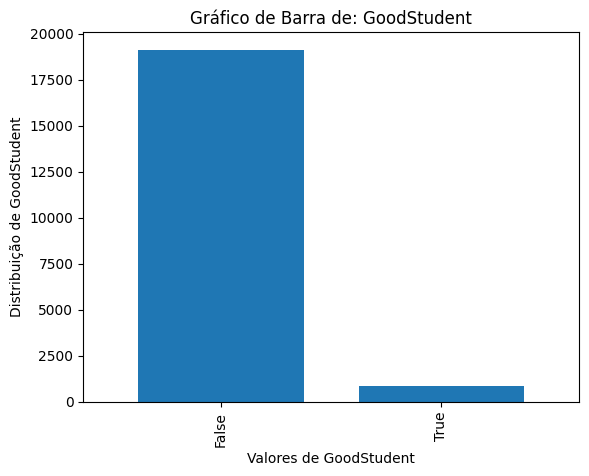

Resumo Estatístico de: GoodStudent 

count     20000
unique        2
top       False
freq      19115
Name: GoodStudent, dtype: object
 
 Nulos na Coluna: 0


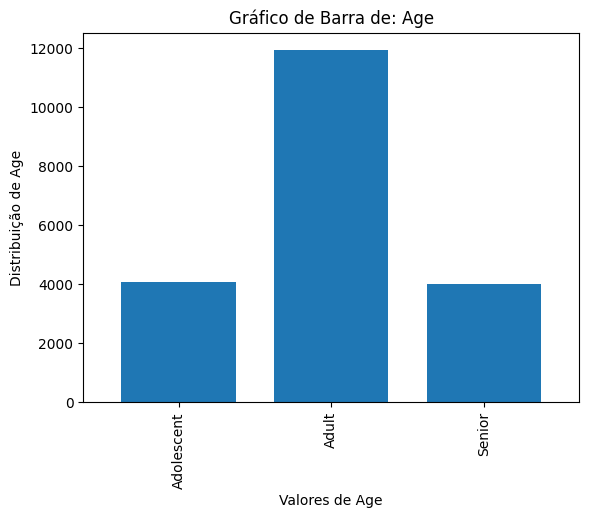

Resumo Estatístico de: Age 

count     20000
unique        3
top       Adult
freq      11939
Name: Age, dtype: object
 
 Nulos na Coluna: 0


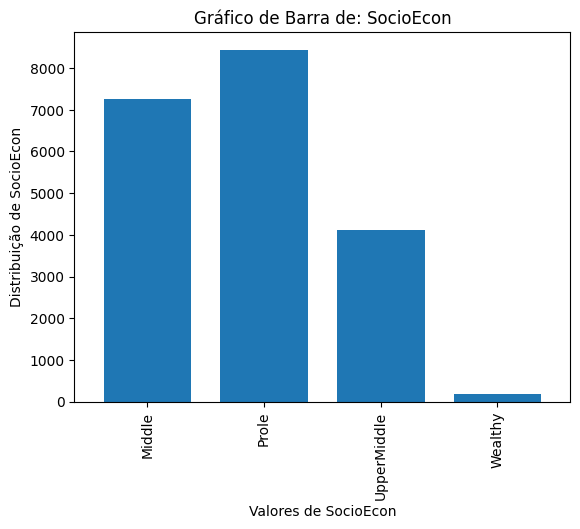

Resumo Estatístico de: SocioEcon 

count     20000
unique        4
top       Prole
freq       8444
Name: SocioEcon, dtype: object
 
 Nulos na Coluna: 0


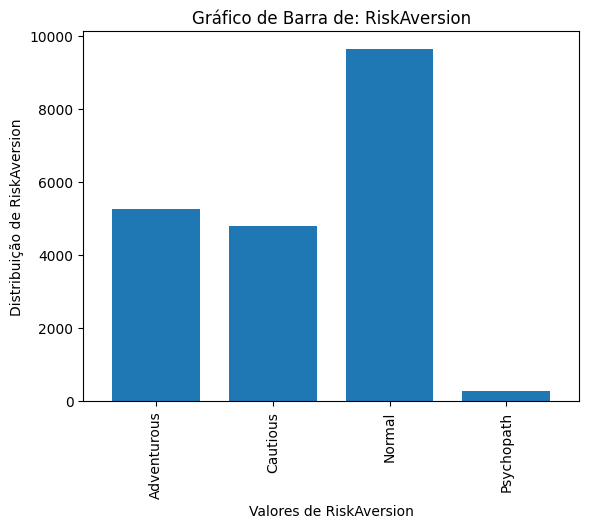

Resumo Estatístico de: RiskAversion 

count      20000
unique         4
top       Normal
freq        9644
Name: RiskAversion, dtype: object
 
 Nulos na Coluna: 0


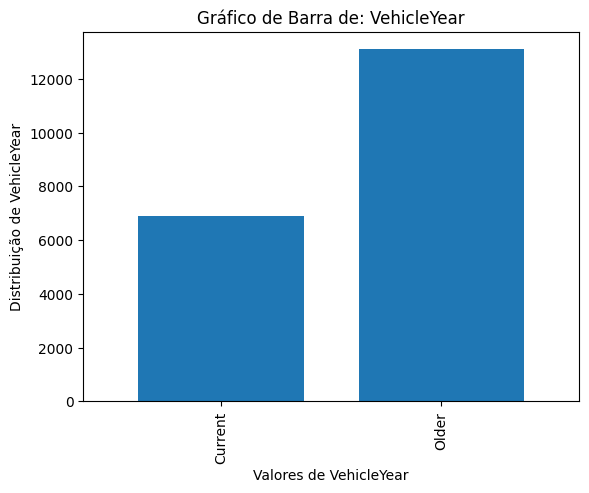

Resumo Estatístico de: VehicleYear 

count     20000
unique        2
top       Older
freq      13089
Name: VehicleYear, dtype: object
 
 Nulos na Coluna: 0


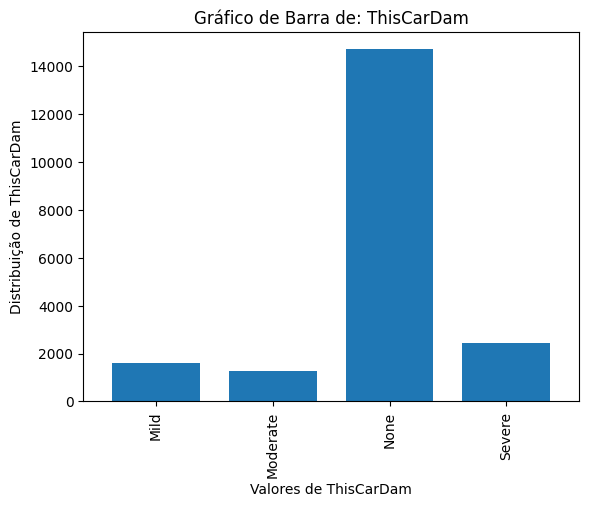

Resumo Estatístico de: ThisCarDam 

count     20000
unique        4
top        None
freq      14681
Name: ThisCarDam, dtype: object
 
 Nulos na Coluna: 0


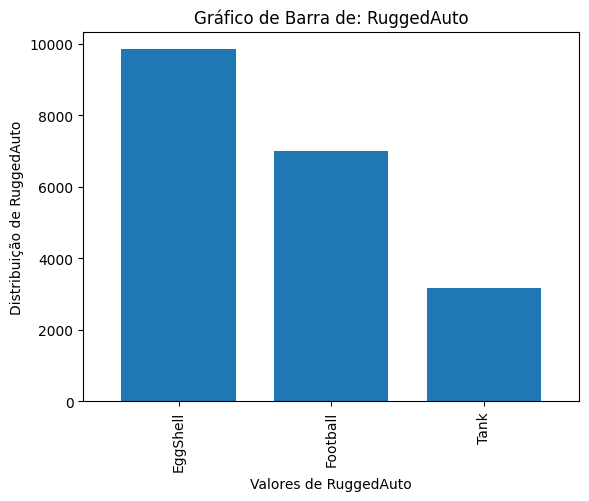

Resumo Estatístico de: RuggedAuto 

count        20000
unique           3
top       EggShell
freq          9838
Name: RuggedAuto, dtype: object
 
 Nulos na Coluna: 0


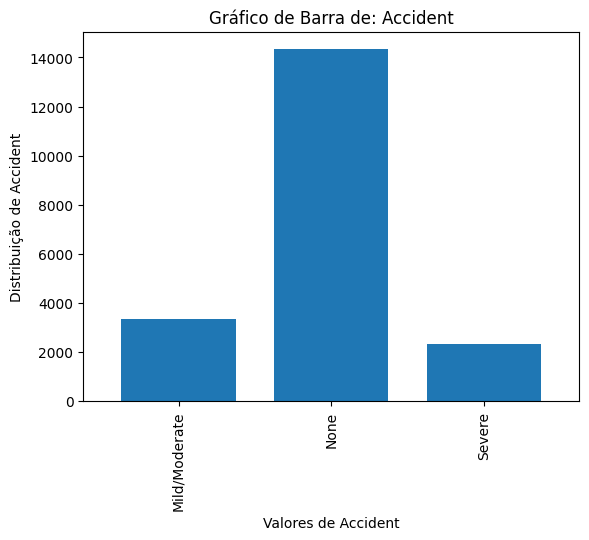

Resumo Estatístico de: Accident 

count     20000
unique        3
top        None
freq      14336
Name: Accident, dtype: object
 
 Nulos na Coluna: 0


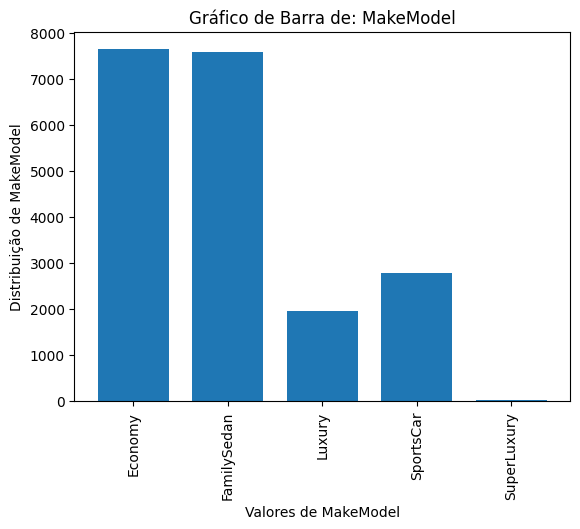

Resumo Estatístico de: MakeModel 

count       20000
unique          5
top       Economy
freq         7637
Name: MakeModel, dtype: object
 
 Nulos na Coluna: 0


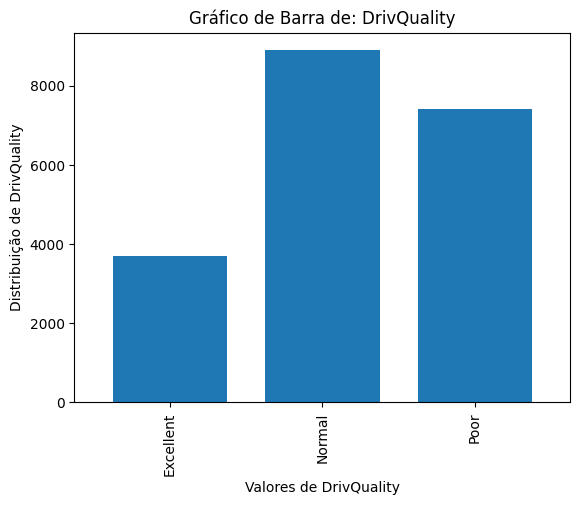

Resumo Estatístico de: DrivQuality 

count      20000
unique         3
top       Normal
freq        8897
Name: DrivQuality, dtype: object
 
 Nulos na Coluna: 0


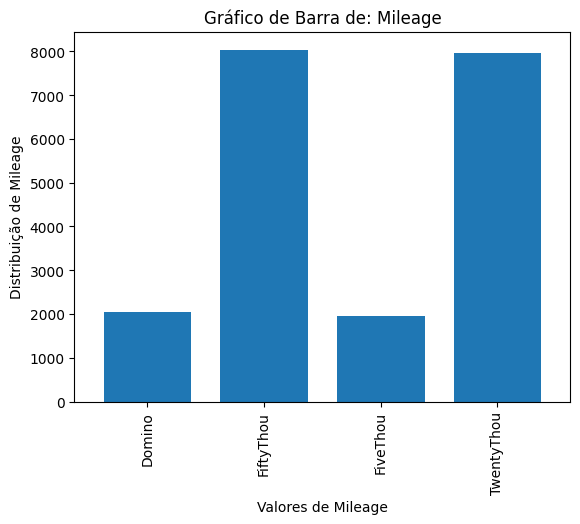

Resumo Estatístico de: Mileage 

count         20000
unique            4
top       FiftyThou
freq           8041
Name: Mileage, dtype: object
 
 Nulos na Coluna: 0


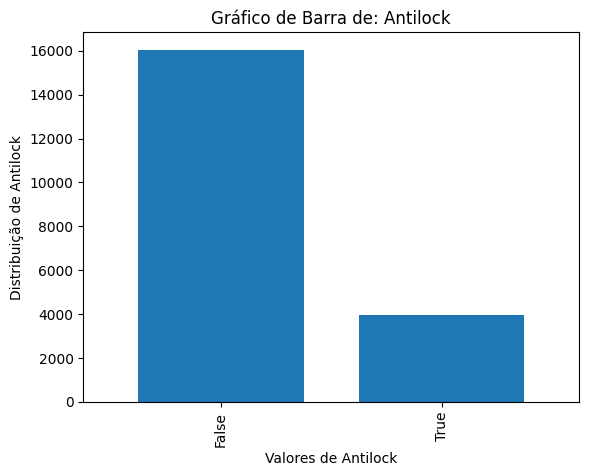

Resumo Estatístico de: Antilock 

count     20000
unique        2
top       False
freq      16041
Name: Antilock, dtype: object
 
 Nulos na Coluna: 0


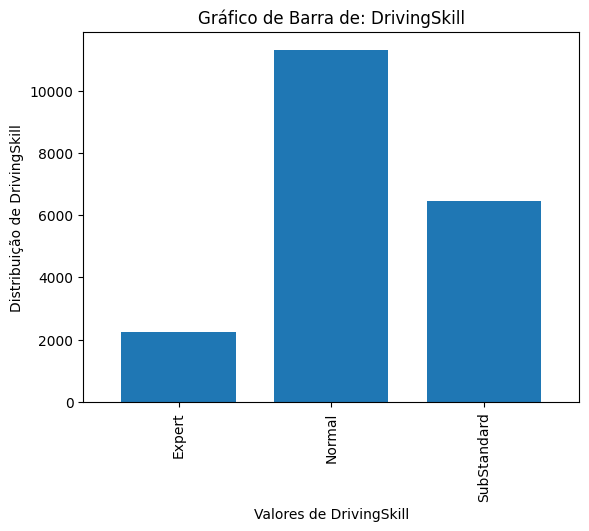

Resumo Estatístico de: DrivingSkill 

count      20000
unique         3
top       Normal
freq       11308
Name: DrivingSkill, dtype: object
 
 Nulos na Coluna: 0


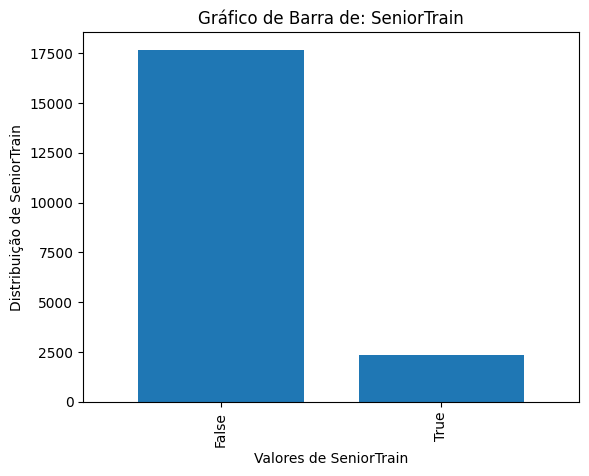

Resumo Estatístico de: SeniorTrain 

count     20000
unique        2
top       False
freq      17665
Name: SeniorTrain, dtype: object
 
 Nulos na Coluna: 0


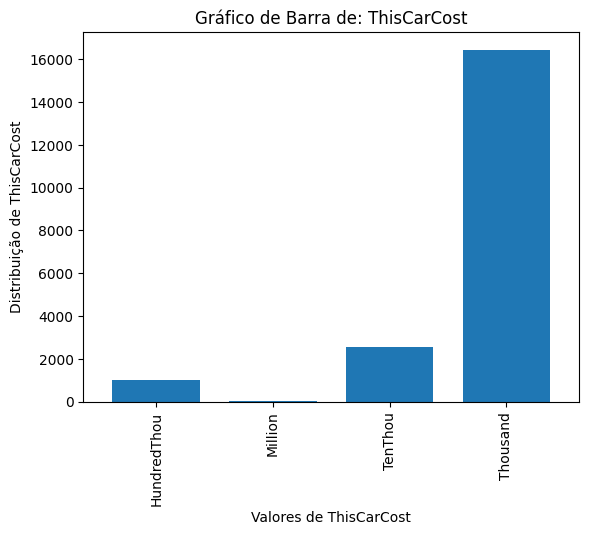

Resumo Estatístico de: ThisCarCost 

count        20000
unique           4
top       Thousand
freq         16443
Name: ThisCarCost, dtype: object
 
 Nulos na Coluna: 0


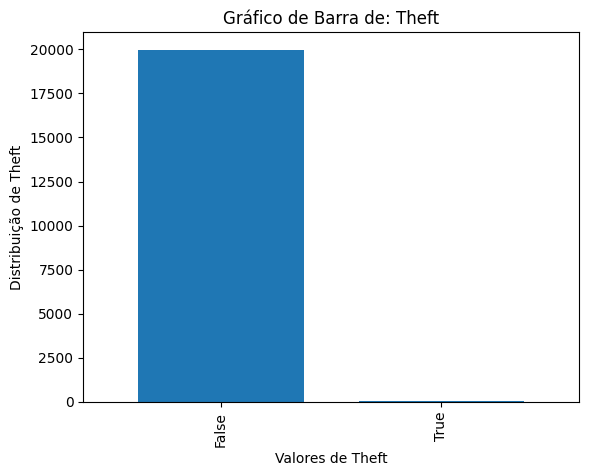

Resumo Estatístico de: Theft 

count     20000
unique        2
top       False
freq      19969
Name: Theft, dtype: object
 
 Nulos na Coluna: 0


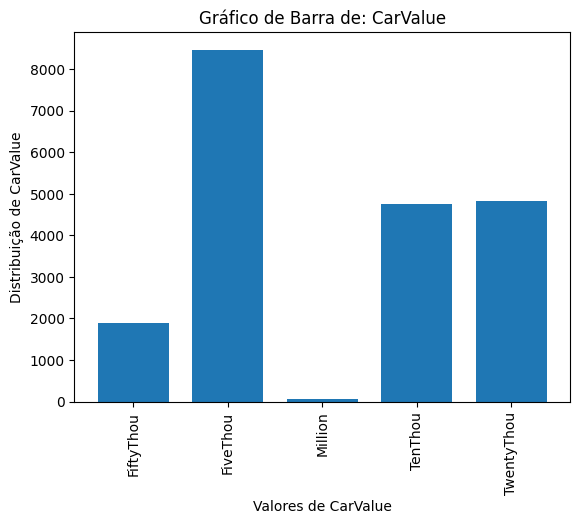

Resumo Estatístico de: CarValue 

count        20000
unique           5
top       FiveThou
freq          8467
Name: CarValue, dtype: object
 
 Nulos na Coluna: 0


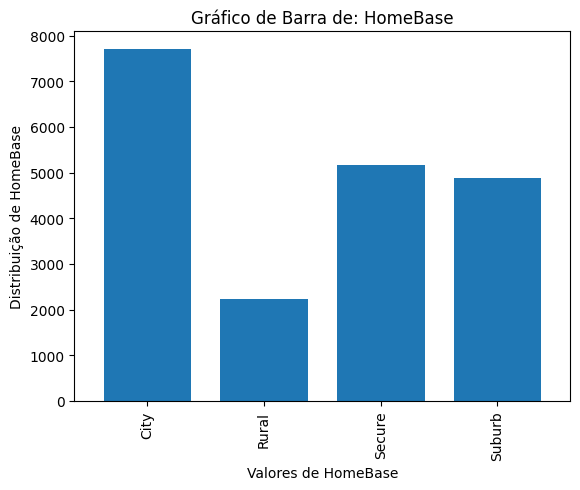

Resumo Estatístico de: HomeBase 

count     20000
unique        4
top        City
freq       7709
Name: HomeBase, dtype: object
 
 Nulos na Coluna: 0


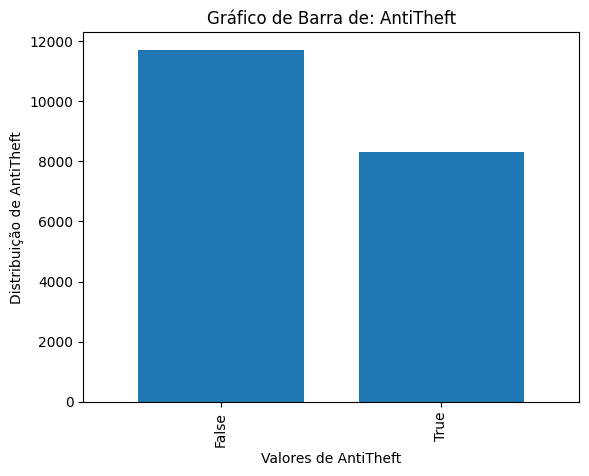

Resumo Estatístico de: AntiTheft 

count     20000
unique        2
top       False
freq      11705
Name: AntiTheft, dtype: object
 
 Nulos na Coluna: 0


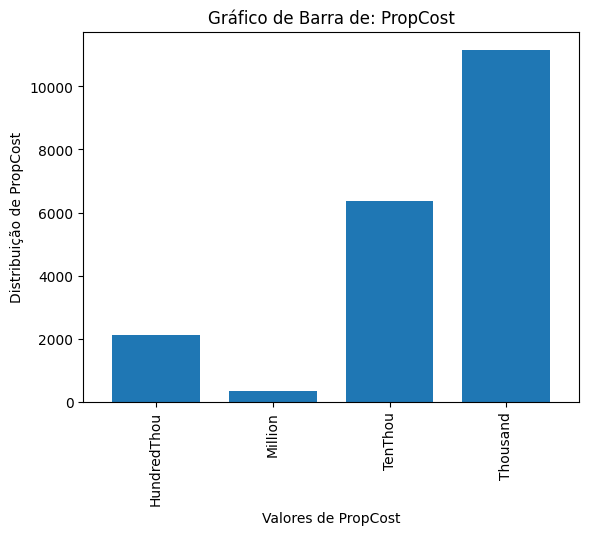

Resumo Estatístico de: PropCost 

count        20000
unique           4
top       Thousand
freq         11170
Name: PropCost, dtype: object
 
 Nulos na Coluna: 0


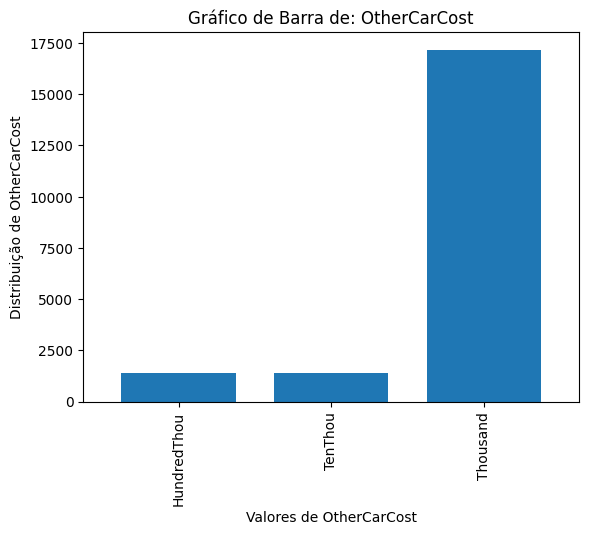

Resumo Estatístico de: OtherCarCost 

count        20000
unique           3
top       Thousand
freq         17180
Name: OtherCarCost, dtype: object
 
 Nulos na Coluna: 0


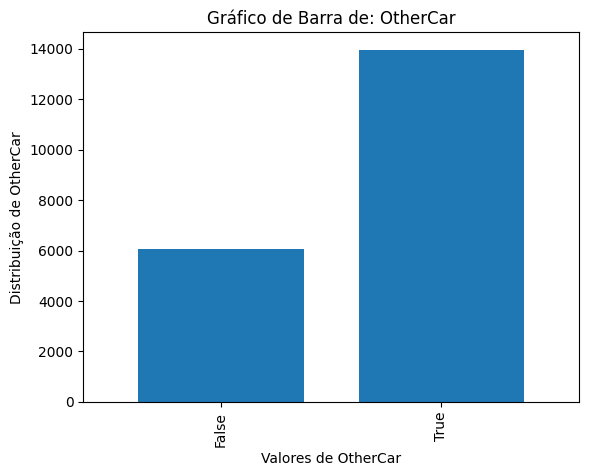

Resumo Estatístico de: OtherCar 

count     20000
unique        2
top        True
freq      13955
Name: OtherCar, dtype: object
 
 Nulos na Coluna: 0


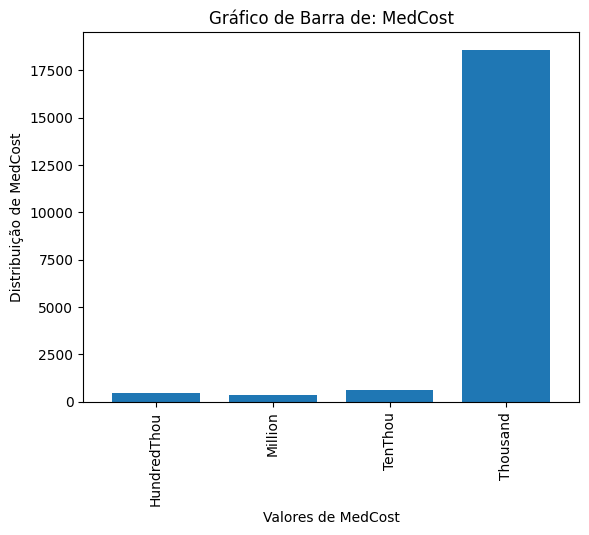

Resumo Estatístico de: MedCost 

count        20000
unique           4
top       Thousand
freq         18589
Name: MedCost, dtype: object
 
 Nulos na Coluna: 0


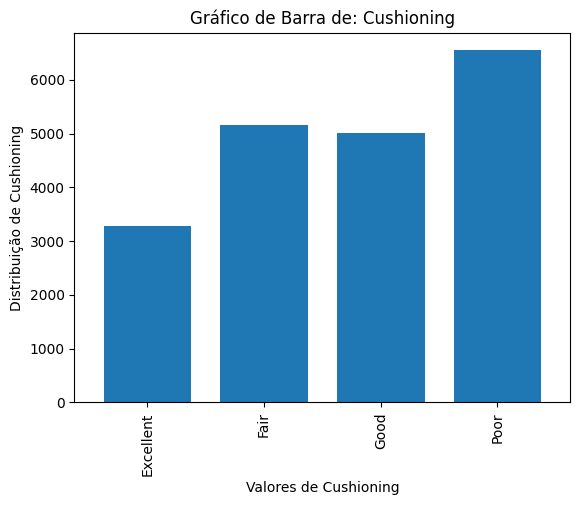

Resumo Estatístico de: Cushioning 

count     20000
unique        4
top        Poor
freq       6547
Name: Cushioning, dtype: object
 
 Nulos na Coluna: 0


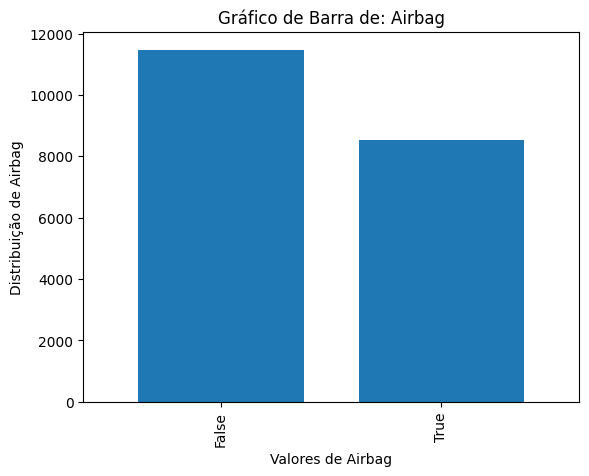

Resumo Estatístico de: Airbag 

count     20000
unique        2
top       False
freq      11468
Name: Airbag, dtype: object
 
 Nulos na Coluna: 0


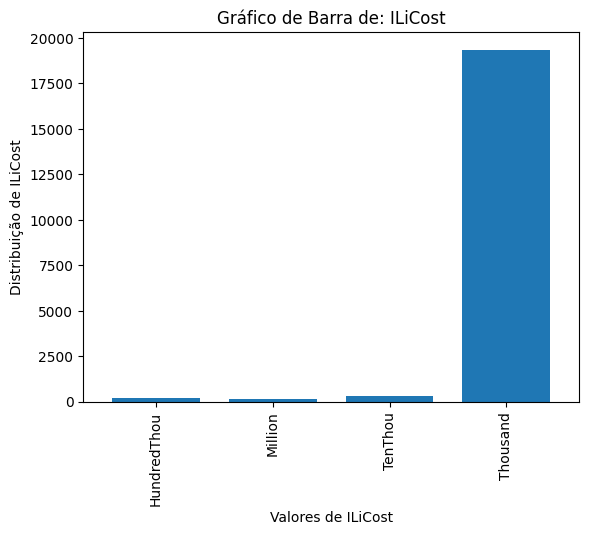

Resumo Estatístico de: ILiCost 

count        20000
unique           4
top       Thousand
freq         19356
Name: ILiCost, dtype: object
 
 Nulos na Coluna: 0


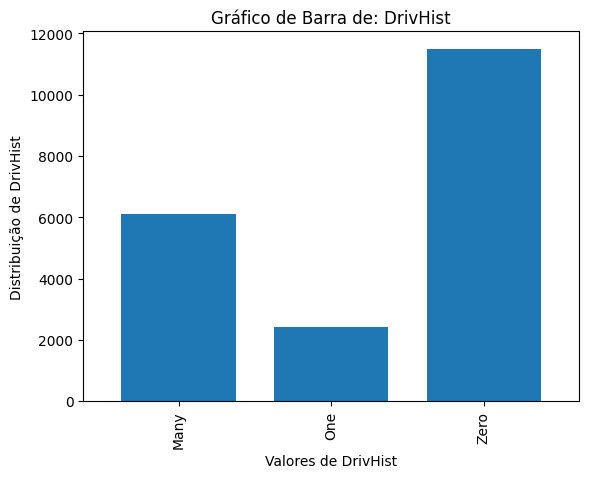

Resumo Estatístico de: DrivHist 

count     20000
unique        3
top        Zero
freq      11486
Name: DrivHist, dtype: object
 
 Nulos na Coluna: 0


In [10]:
for col in insurance.columns:
    insurance.groupby(col).size().plot(kind="bar", width = 0.75)
    plt.title(f"Gráfico de Barra de: {col}")
    plt.ylabel(f"Distribuição de {col}")
    plt.xlabel(f"Valores de {col}")
    plt.show()

    print(f"Resumo Estatístico de: {col} \n")
    print(insurance[col].describe() )

    nulos = insurance[col].isnull().sum()
    print(f" \n Nulos na Coluna: {nulos}")

In [13]:
for colunas in insurance.columns:
    insurance[colunas] = insurance[colunas].cat.codes
insurance

GoodStudent  Age  SocioEcon  RiskAversion  VehicleYear  ThisCarDam  \
0                0    1          1             0            1           1   
1                0    2          1             1            0           2   
2                0    2          2             3            0           2   
3                0    0          0             2            1           2   
4                0    0          1             2            1           1   
...            ...  ...        ...           ...          ...         ...   
19995            0    1          1             0            1           0   
19996            0    1          0             2            1           2   
19997            0    2          2             2            0           2   
19998            0    1          0             2            1           2   
19999            0    1          0             2            1           2   

       RuggedAuto  Accident  MakeModel  DrivQuality  ...  HomeBase  AntiTheft  \
0               0         0          0            2  ...         0          0   
1               1         1          0            1  ...         0          1   
2               1         1          1            0  ...         0          0   
3               0         1          0            1  ...         3          0   
4               1         0          0            2  ...         0          0   
...           ...       ...        ...          ...  ...       ...        ...   
19995           1         0          0            2  ...         0          0   
19996           2         1          1            1  ...         3          0   
19997           1         1          2            0  ...         2          1   
19998           1         1          1            0  ...         3          0   
19999           2         1          1            0  ...         2          0   

       PropCost  OtherCarCost  OtherCar  MedCost  Cushioning  Airbag  ILiCost  \
0             2             2         1        3           3       0        3   
1             3             2         1        3           2       1        3   
2             3             2         0        3           2       1        3   
3             3             2         1        3           1       0        3   
4             2             2         0        3           1       0        3   
...         ...           ...       ...      ...         ...     ...      ...   
19995         3             2         1        3           1       0        3   
19996         3             2         1        3           2       0        3   
19997         2             2         0        3           0       1        3   
19998         3             2         1        3           2       1        3   
19999         3             2         1        3           0       1        3   

       DrivHist  
0             0  
1             2  
2             1  
3             2  
4             0  
...         ...  
19995         0  
19996         2  
19997         2  
19998         2  
19999         2  

[20000 rows x 27 columns]

<Axes: >

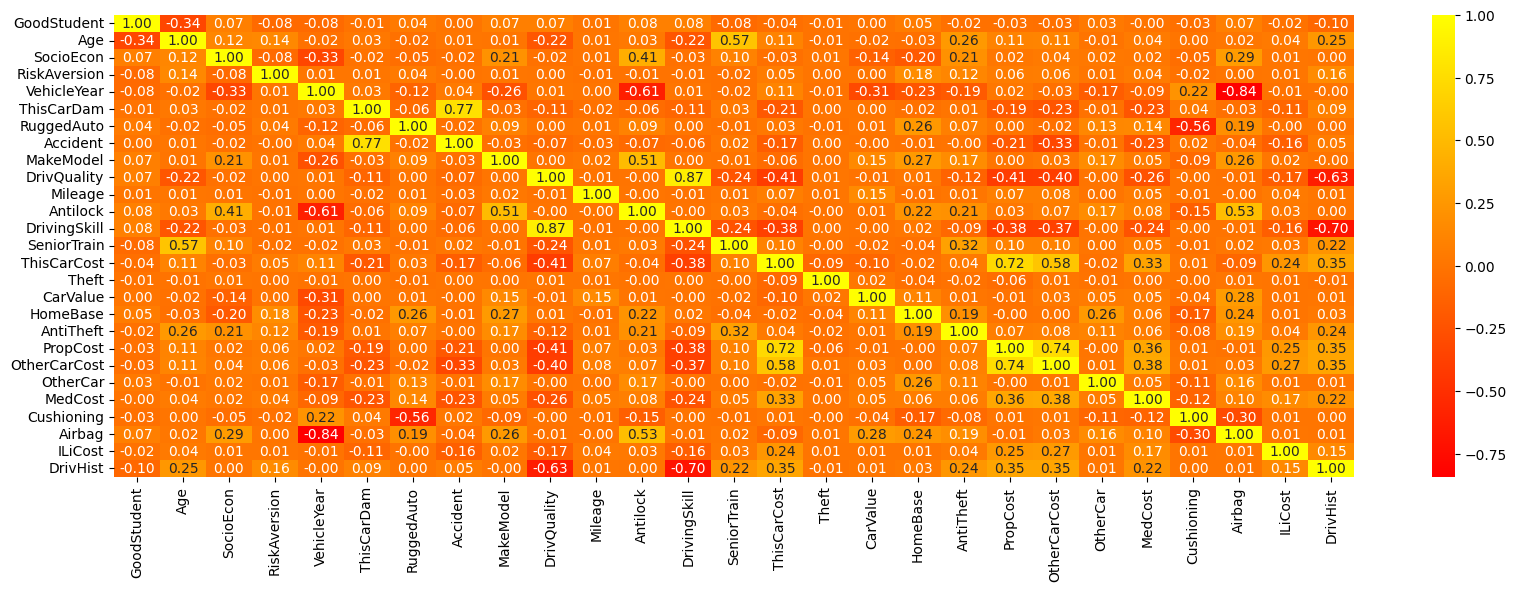

In [15]:
plt.figure(figsize=(20,6))
corr = insurance.corr()
heatmap(corr, fmt=".2f", cmap="autumn", annot=True)

In [20]:
insurance.drop(["ThisCarDam", "SeniorTrain", "Airbag", 
                                            "Cushioning", "MakeModel", "DrivQuality", "DrivHist", "OtherCarCost", "PropCost", "ThisCarCost"], axis=1)
insurance.head()

GoodStudent  Age  SocioEcon  RiskAversion  VehicleYear  ThisCarDam  \
0            0    1          1             0            1           1   
1            0    2          1             1            0           2   
2            0    2          2             3            0           2   
3            0    0          0             2            1           2   
4            0    0          1             2            1           1   

   RuggedAuto  Accident  MakeModel  DrivQuality  ...  HomeBase  AntiTheft  \
0           0         0          0            2  ...         0          0   
1           1         1          0            1  ...         0          1   
2           1         1          1            0  ...         0          0   
3           0         1          0            1  ...         3          0   
4           1         0          0            2  ...         0          0   

   PropCost  OtherCarCost  OtherCar  MedCost  Cushioning  Airbag  ILiCost  \
0         2             2         1        3           3       0        3   
1         3             2         1        3           2       1        3   
2         3             2         0        3           2       1        3   
3         3             2         1        3           1       0        3   
4         2             2         0        3           1       0        3   

   DrivHist  
0         0  
1         2  
2         1  
3         2  
4         0  

[5 rows x 27 columns]

In [21]:
X = insurance.drop("Accident", axis=1)
y = insurance.iloc[:,7]
y

0        0
1        1
2        1
3        1
4        0
        ..
19995    0
19996    1
19997    1
19998    1
19999    1
Name: Accident, Length: 20000, dtype: int8

In [22]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=3217)
X_treino.shape

(14000, 26)

In [23]:
seletor = SelectKBest(chi2, k = 16)                     
seletor.fit(X_treino, y_treino)
X_treino = seletor.transform(X_treino)
X_teste = seletor.transform(X_teste)

In [ ]:
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [24]:
colunas_selecionadas = X.columns[seletor.get_support()]
colunas_selecionadas

Index(['GoodStudent', 'Age', 'RiskAversion', 'ThisCarDam', 'DrivQuality',
       'Mileage', 'Antilock', 'DrivingSkill', 'SeniorTrain', 'ThisCarCost',
       'AntiTheft', 'PropCost', 'OtherCarCost', 'MedCost', 'ILiCost',
       'DrivHist'],
      dtype='object')

In [25]:
X_teste.shape

(6000, 16)

In [26]:
param_grid = {
    'n_estimators': [100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None],
    "criterion": ["gini", "entropy"]
}

# Criar o classificador RandomForest
rf = RandomForestClassifier()

# Configurar o Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_treino, y_treino)                           

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=2)

Acurácia:  0.9568333333333333
Recall:  0.9072218504127979
F1-Score:  0.9142344742224218
Precision:  0.9240680940818269


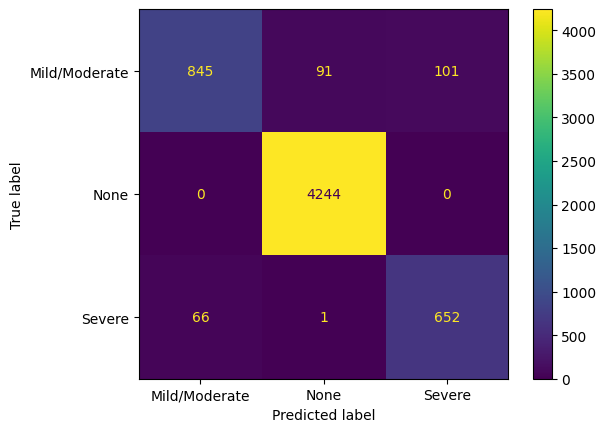

In [27]:
#modelo = RandomForestClassifier(class_weight="balanced").fit(X_treino, y_treino)
previsoes = grid_search.predict(X_teste)
previsoes[:20]
acuracia = accuracy_score(y_teste, previsoes)
recall = recall_score(y_teste, previsoes, average="macro")
f1 = f1_score(y_teste, previsoes, average="macro")
precision = precision_score(y_teste, previsoes, average="macro")

confusao = ConfusionMatrixDisplay.from_estimator(grid_search, X_teste, y_teste, display_labels=["Mild/Moderate", "None", "Severe"])
print("Acurácia: ", acuracia)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Precision: ", precision)

In [28]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1037
           1       0.98      1.00      0.99      4244
           2       0.87      0.91      0.89       719

    accuracy                           0.96      6000
   macro avg       0.92      0.91      0.91      6000
weighted avg       0.96      0.96      0.96      6000



In [29]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.421-b09, mixed mode)
  Starting server from C:\Users\roni_\anaconda3\envs\redes_neurais\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\roni_\AppData\Local\Temp\tmpucpzgn5w
  JVM stdout: C:\Users\roni_\AppData\Local\Temp\tmpucpzgn5w\h2o_roni__started_from_python.out
  JVM stderr: C:\Users\roni_\AppData\Local\Temp\tmpucpzgn5w\h2o_roni__started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       America/Sao_Paulo
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    3 months and 8 days
H2O_cluster_name:           H2O_from_python_roni__k35g96
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.532 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.19 final
--------------------------  -----------------------------

In [30]:
dados = h2o.H2OFrame(insurance.drop("ThisCarDam", axis=1))
dados

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


GoodStudent    Age    SocioEcon    RiskAversion    VehicleYear    RuggedAuto    Accident    MakeModel    DrivQuality    Mileage    Antilock    DrivingSkill    SeniorTrain    ThisCarCost    Theft    CarValue    HomeBase    AntiTheft    PropCost    OtherCarCost    OtherCar    MedCost    Cushioning    Airbag    ILiCost    DrivHist
-------------  -----  -----------  --------------  -------------  ------------  ----------  -----------  -------------  ---------  ----------  --------------  -------------  -------------  -------  ----------  ----------  -----------  ----------  --------------  ----------  ---------  ------------  --------  ---------  ----------
            0      1            1               0              1             0           0            0              2          3           0               2              0              2        0           1           0            0           2               2           1          3             3         0          3           0
            0      2            1               1              0             1           1            0              1          3           0               1              1              3        0           3           0            1           3               2           1          3             2         1          3           2
            0      2            2               3              0             1           1            1              0          0           1               1              0              3        0           4           0            0           3               2           0          3             2         1          3           1
            0      0            0               2              1             0           1            0              1          1           0               1              0              3        0           1           3            0           3               2           1          3             1         0          3           2
            0      0            1               2              1             1           0            0              2          1           0               2              0              2        0           1           0            0           2               2           0          3             1         0          3           0
            0      1            2               2              0             0           0            3              2          1           1               2              0              0        0           4           3            1           0               0           1          2             3         1          3           0
            0      2            2               2              0             1           0            0              2          2           0               2              0              2        0           3           2            1           2               2           0          3             0         1          3           0
            0      1            1               2              1             0           2            0              2          3           0               2              0              2        0           3           0            0           1               0           1          3             1         0          3           0
            0      1            1               2              1             0           2            0              2          3           0               2              0              2        0           1           0            0           0               1           0          2             3         0          3           0
            1      0            1               1              1             1           2            1              2          3           0               2              0              2        0           1           0            1           0               0           1          3             2         0          3           0
[20000 rows x 26 c

In [31]:
treino, teste = dados.split_frame(ratios=[.7], seed=3215)
teste.shape

(5943, 26)

In [32]:
treino["Accident"] = treino["Accident"].asfactor()
teste["Accident"] = teste["Accident"].asfactor()

In [33]:
modelo_h2o = H2OAutoML(nfolds=0, balance_classes=True, max_runtime_secs=360, seed=3215, sort_metric="AUTO")
modelo_h2o.train(y="Accident", training_frame=treino, validation_frame=teste)

AutoML progress: |
21:30:36.911: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20250210_213036_model_2


Status of Neuron Layers: predicting Accident, 3-class classification, multinomial distribution, CrossEntropy loss, 1.453 weights/biases, 24,8 KB, 7.899.195 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight          weight_rms         mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  --------------------  ----------  -------------------  -----------------  --------------------  -------------------
    1        25       Input             5.0
    2        50       RectifierDropout  40.0       0.0   0.0   0.006116414258228906   0.026579521596431732  0.0         0.02030658380415407  0.499361515045166  -0.27225155031758075  0.45371735095977783
    3        3        Softmax                      0.0   0.0   0.0028693989286451447  0.020292766392230988  0.0         -0.4745175538545785  1.077878475189209  0.7528889441926223    0.9902865886688232

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.14348651032077986
RMSE: 0.37879613292743614
LogLoss: 0.5090688994654009
Mean Per-Class Error: 0.20923711607648457
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     Error      Rate
----  ----  ----  ---------  --------------
1690  916   675   0.484913   1.591 / 3.281
186   3199  0     0.0549483  186 / 3.385
292   3     3063  0.0878499  295 / 3.358
2168  4118  3738  0.206704   2.072 / 10.024

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.793296
2    0.999601
3    1

ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.09695949999561018
RMSE: 0.31138320442119255
LogLoss: 0.3359701012943959
Mean Per-Class Error: 0.24100421691041288
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2    Error      Rate
---  ----  ---  ---------  -----------
452  272   217  0.51966    489 / 941
257  4034  0    0.0598928  257 / 4.291
101  1     609  0.14346    102 / 711
810  4307  826  0.142689   848 / 5.943

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.857311
2    0.999327
3    1

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_logloss    training_r2    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_r2    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  ------------------  -------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------  ---------------------------------  ----------------  -------------------
    2025-02-10 21:34:50  0.000 sec                           0         0             0            nan              nan                 nan            nan                              nan             nan                nan                nan                   nan         

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ------------
DeepLearning_grid_1_AutoML_1_20250210_213036_model_2                0.241004   0.33597   0.311383  0.0969595               37258                   0.007297  DeepLearning
DeepLearning_grid_1_AutoML_1_20250210_213036_model_7                0.241187   0.424014  0.320304  0.102595                  799                   0.005159  DeepLearning
DeepLearning_grid_1_AutoML_1_20250210_213036_model_3                0.243573   0.305237  0.305522  0.0933436               22761                   0.006416  DeepLearning
GBM_grid_1_AutoML_1_20250210_213036_model_24                        0.253625   0.277715  0.296487  0.0879048                1873                   0.074661  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_3                         0.254455   0.279843  0.297763  0.0886627                1857                   0.175687  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_10                        0.254819   0.279318  0.297855  0.0887178                2055                   0.128296  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_20                        0.255197   0.279144  0.29688   0.0881374                2036                   0.05765   GBM
GBM_grid_1_AutoML_1_20250210_213036_model_15                        0.256471   0.279836  0.297049  0.0882383                1889                   0.056424  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_33                        0.25657    0.279133  0.297177  0.0883144                1943                   0.095653  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_26                        0.257266   0.278588  0.297098  0.0882673                1684                   0.047271  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_5                         0.257811   0.286787  0.302426  0.0914614                3015                   0.090694  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_23                        0.258109   0.290114  0.300334  0.0902005                9533                   0.066756  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_30                        0.258361   0.281938  0.298626  0.0891778                2200                   0.08002   GBM
GBM_grid_1_AutoML_1_20250210_213036_model_2                         0.258674   0.287479  0.300635  0.0903815                3797                   0.074829  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_13                        0.258923   0.283973  0.299065  0.0894401                3770                   0.072228  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_35                        0.260468   0.279038  0.295768  0.0874788                2497                   0.042049  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_7                         0.260613   0.285439  0.300174  0.0901042                2778                   0.056699  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_21                        0.262462   0.278813  0.296091  0.0876699                2444                   0.055965  GBM
DeepLearning_1_AutoML_1_20250210_213036                             0.262944   0.292772  0.301918  0.0911545                1749                   0.006432  DeepLearning
GBM_grid_1_AutoML_1_20250210_213036_model_12                        0.263092   0.278584  0.296157  0.0877093                2849                   0.051531  GBM
[20 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_1_20250210_213036_model_2

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2    Error      Rate
---  ----  ---  ---------  -----------
452  272   217  0.51966    489 / 941
257  4034  0    0.0598928  257 / 4.291
101  1     609  0.14346    102 / 711
810  4307  826  0.142689   848 / 5.943

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

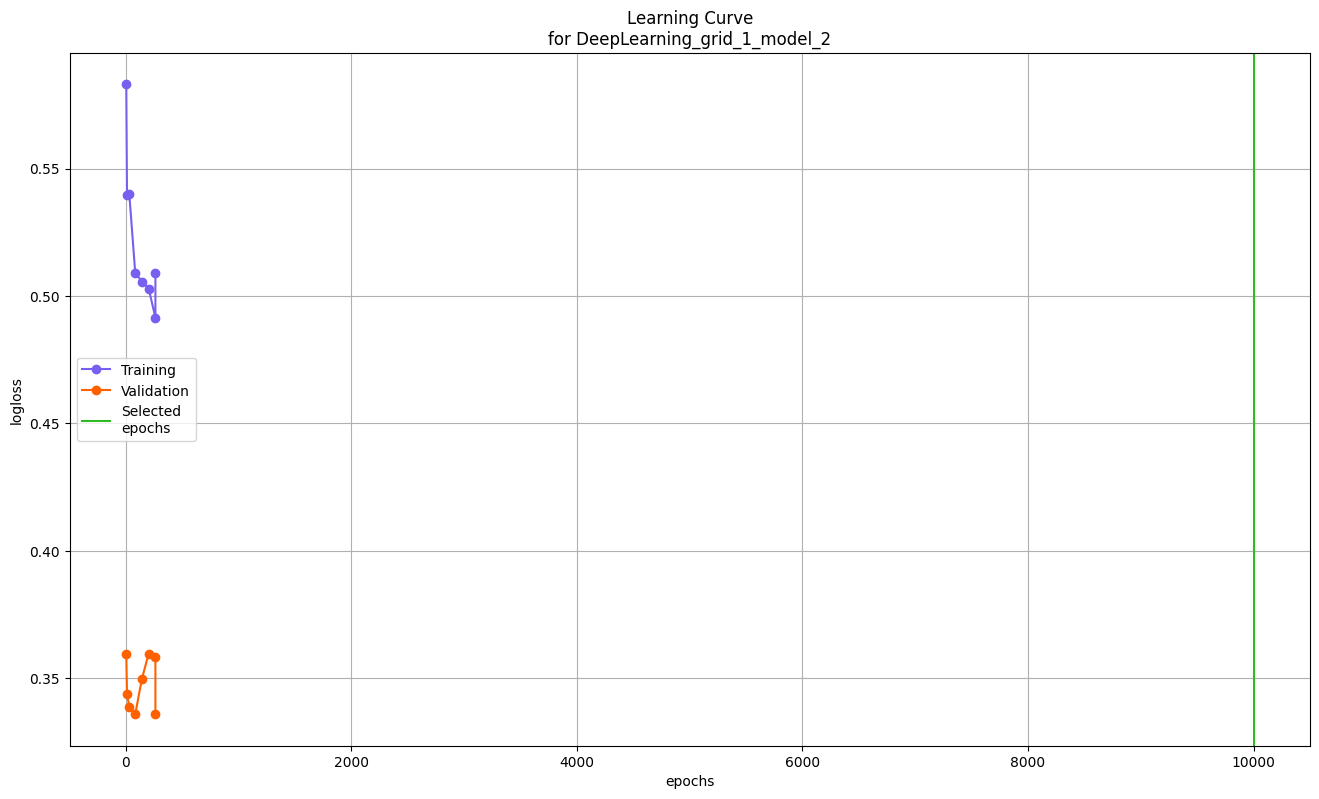

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

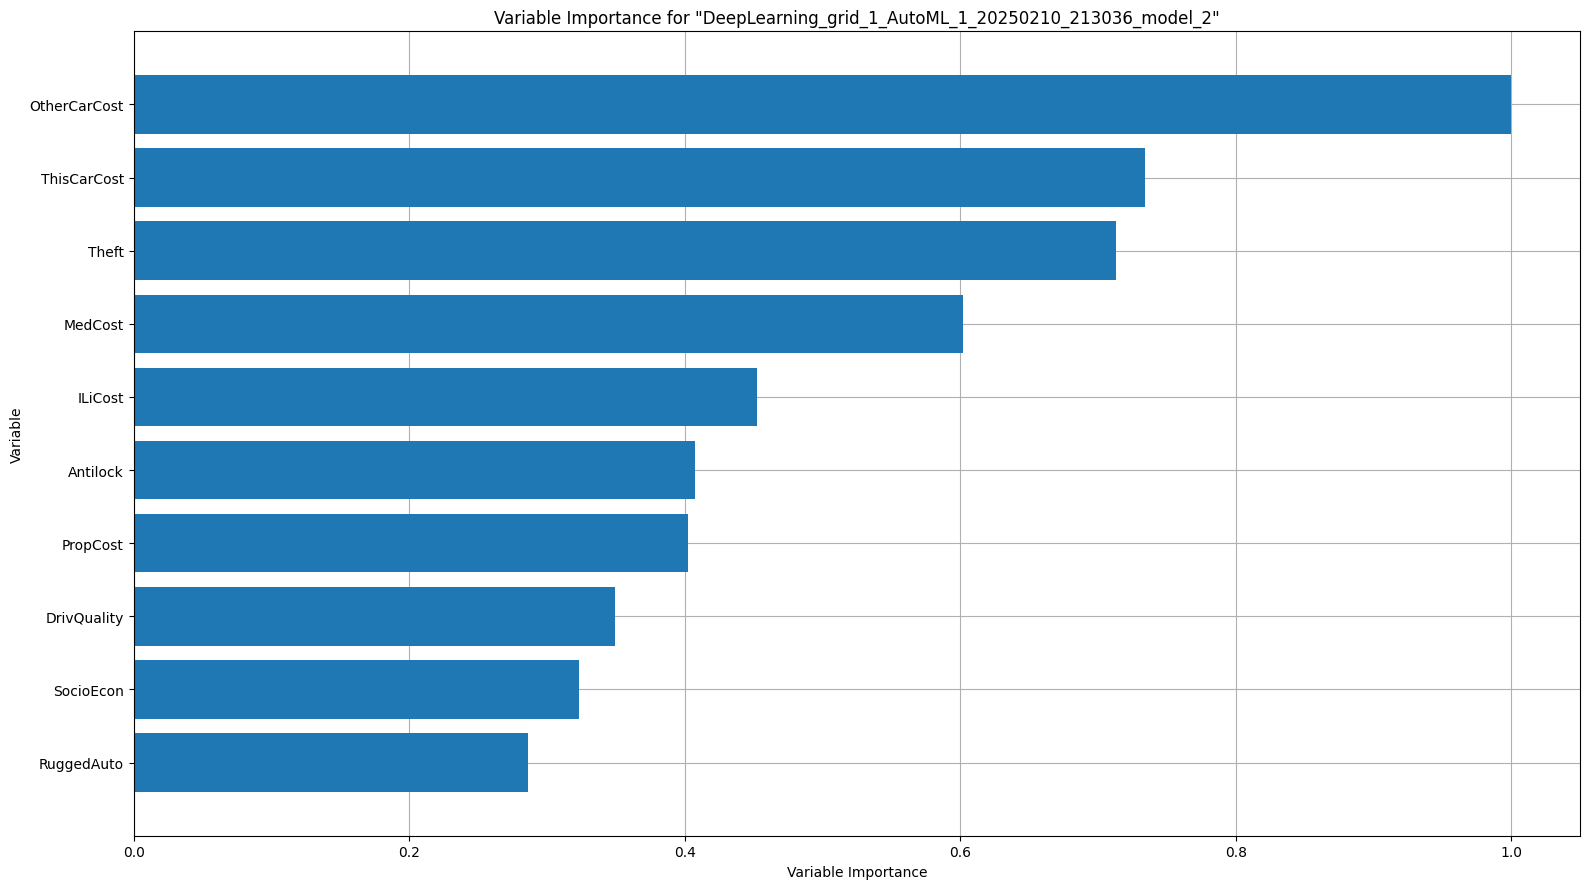

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

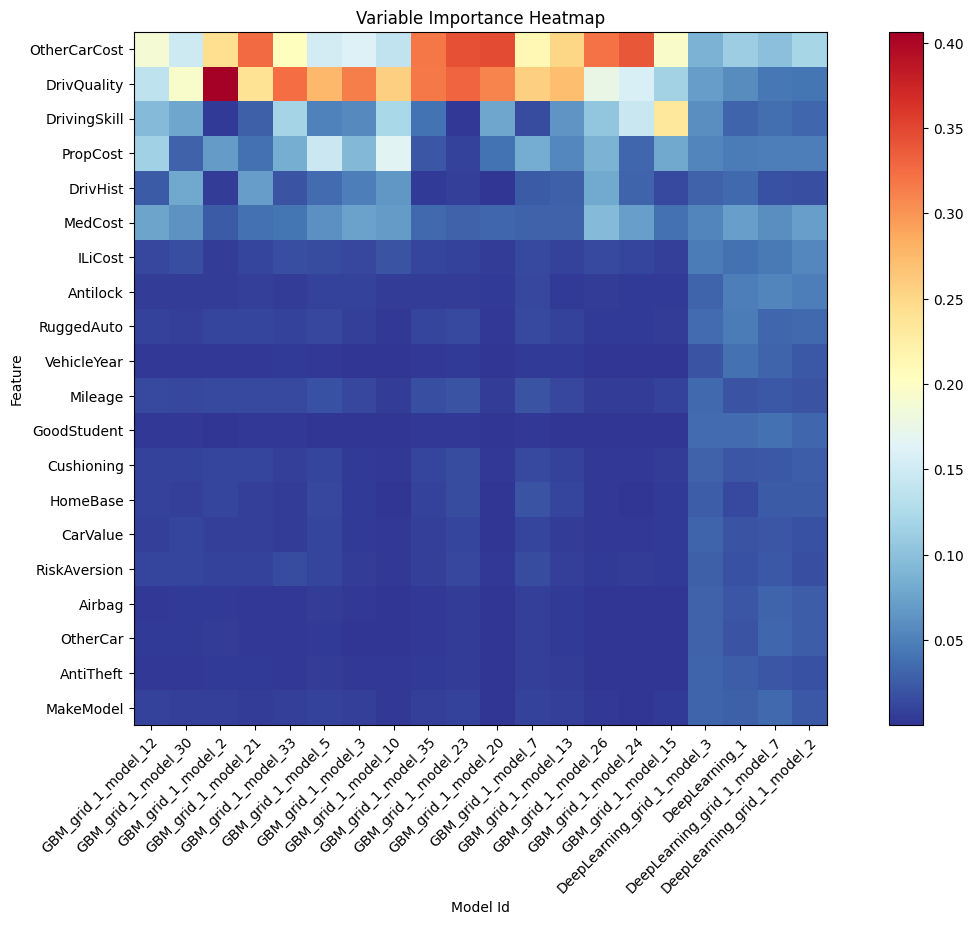

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

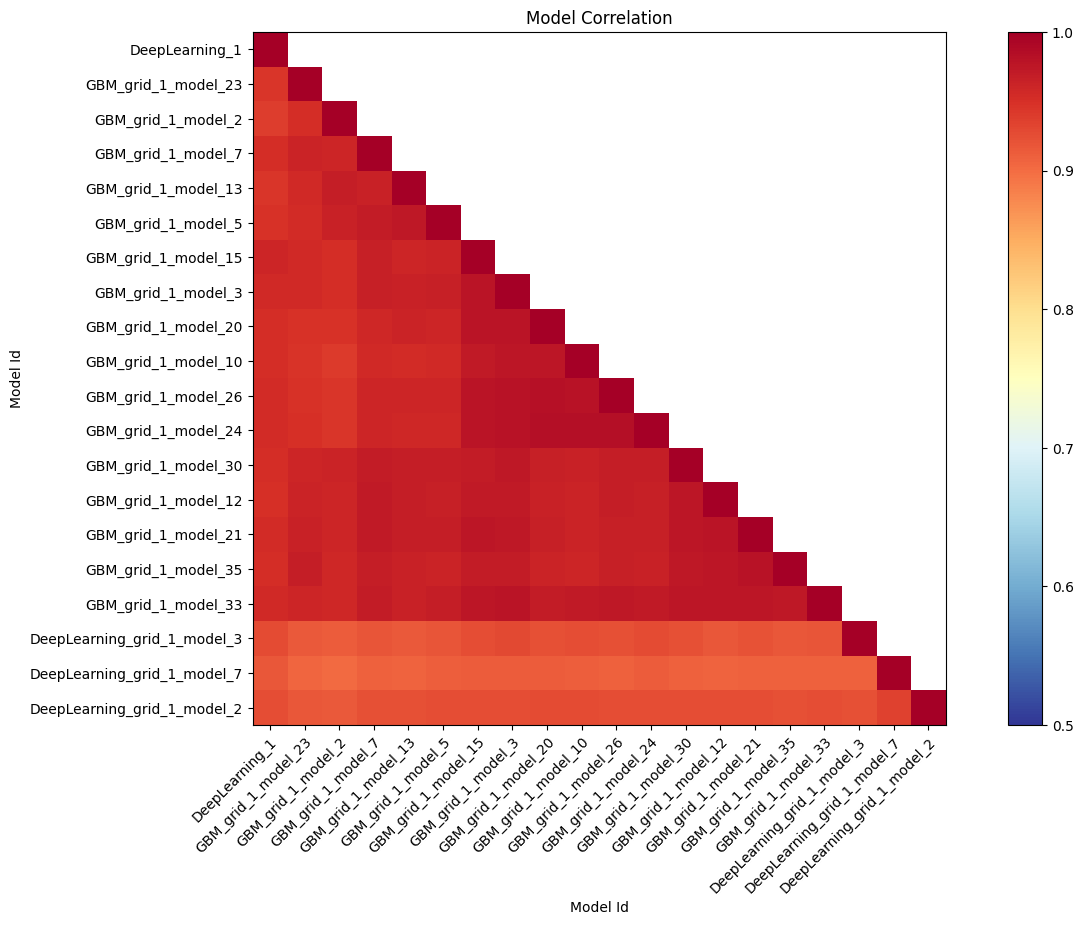

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

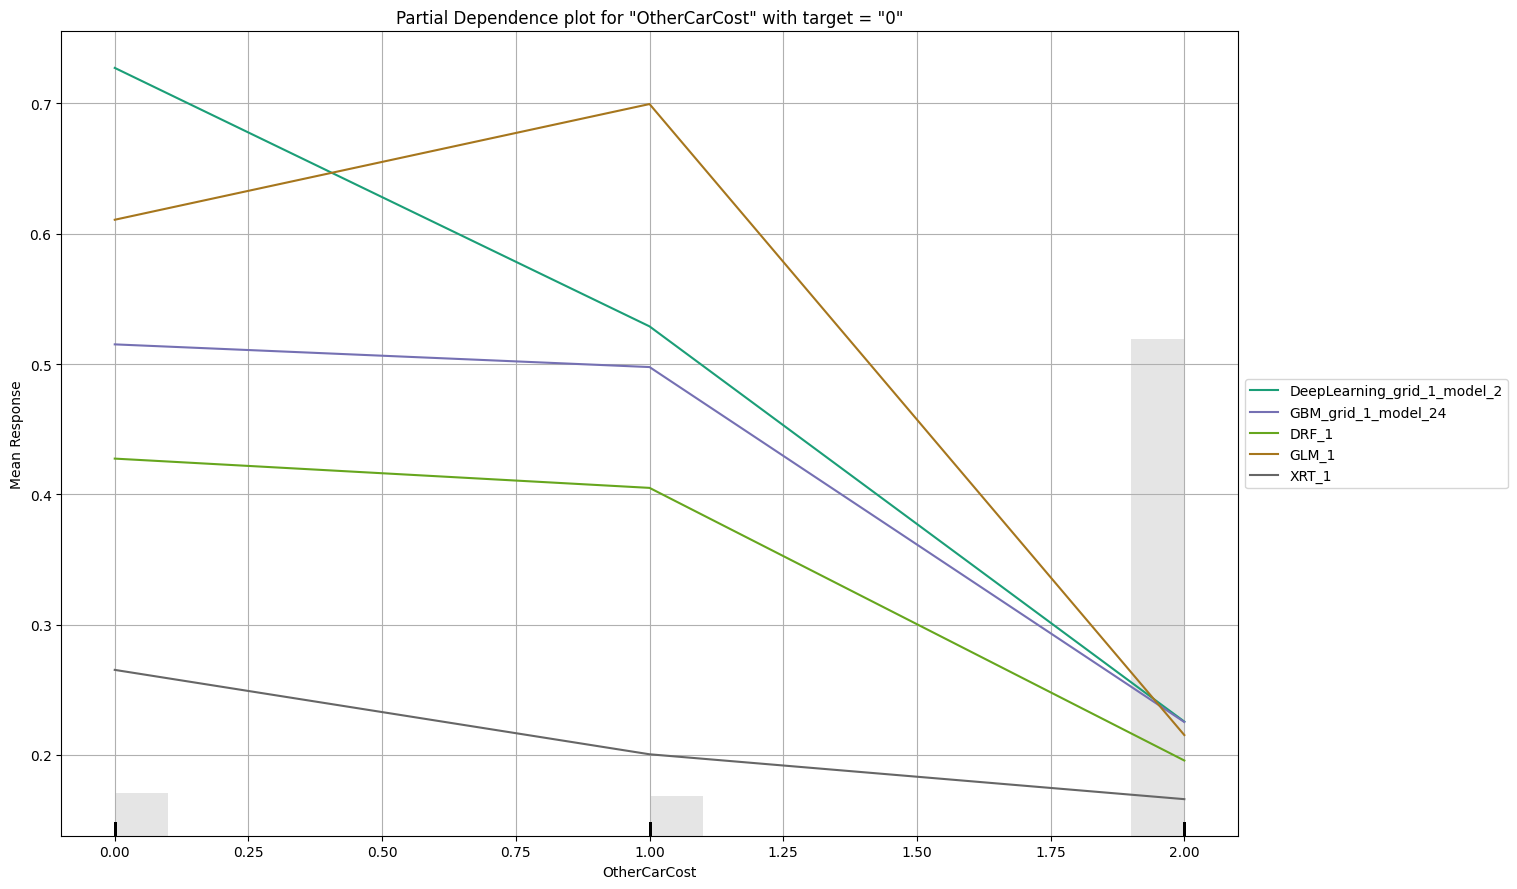

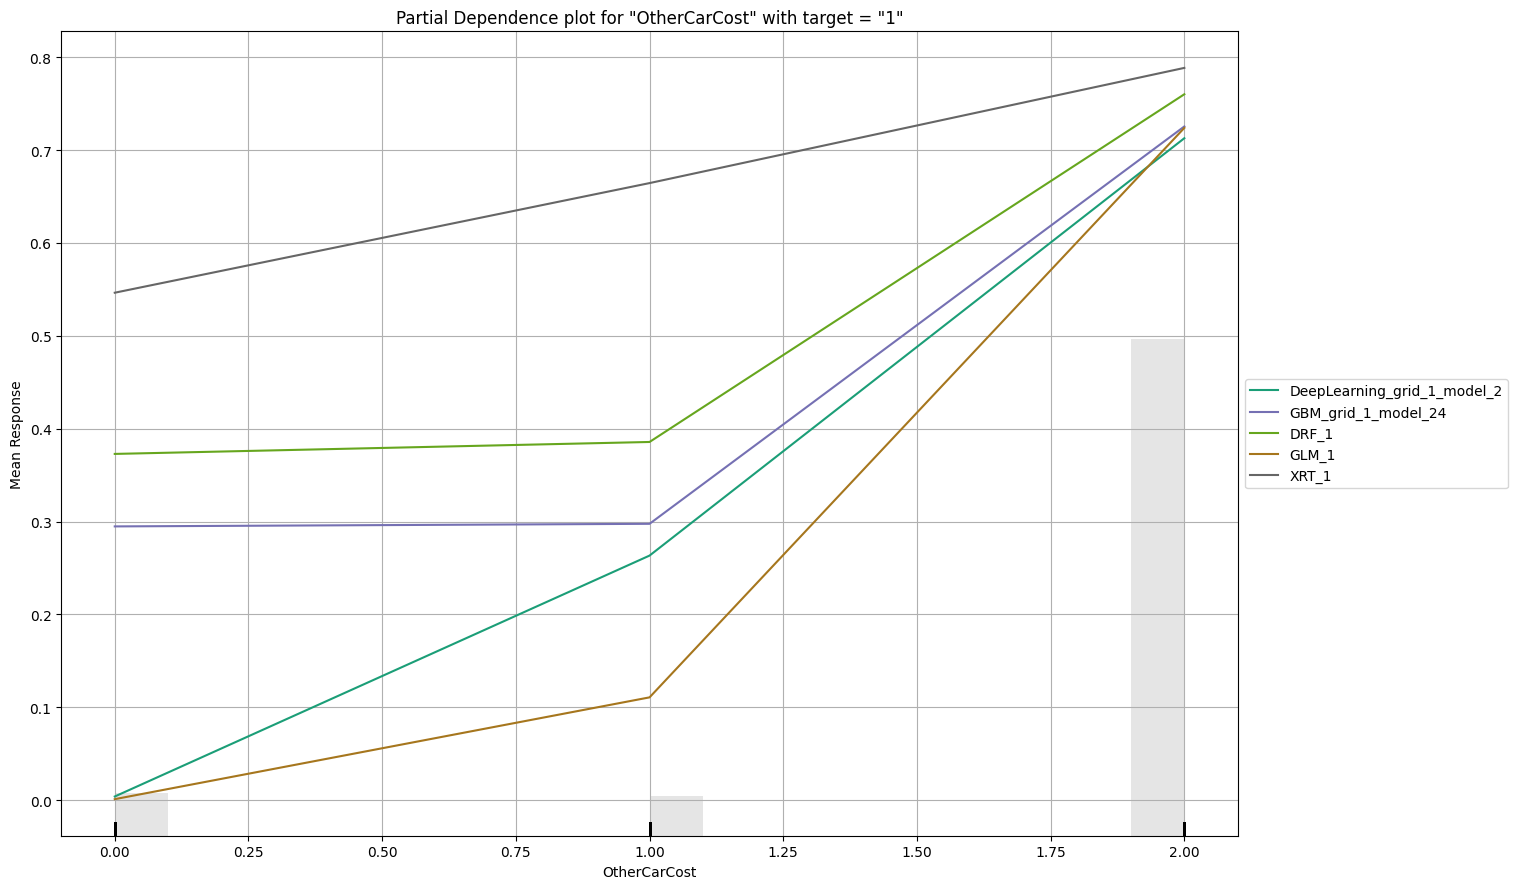

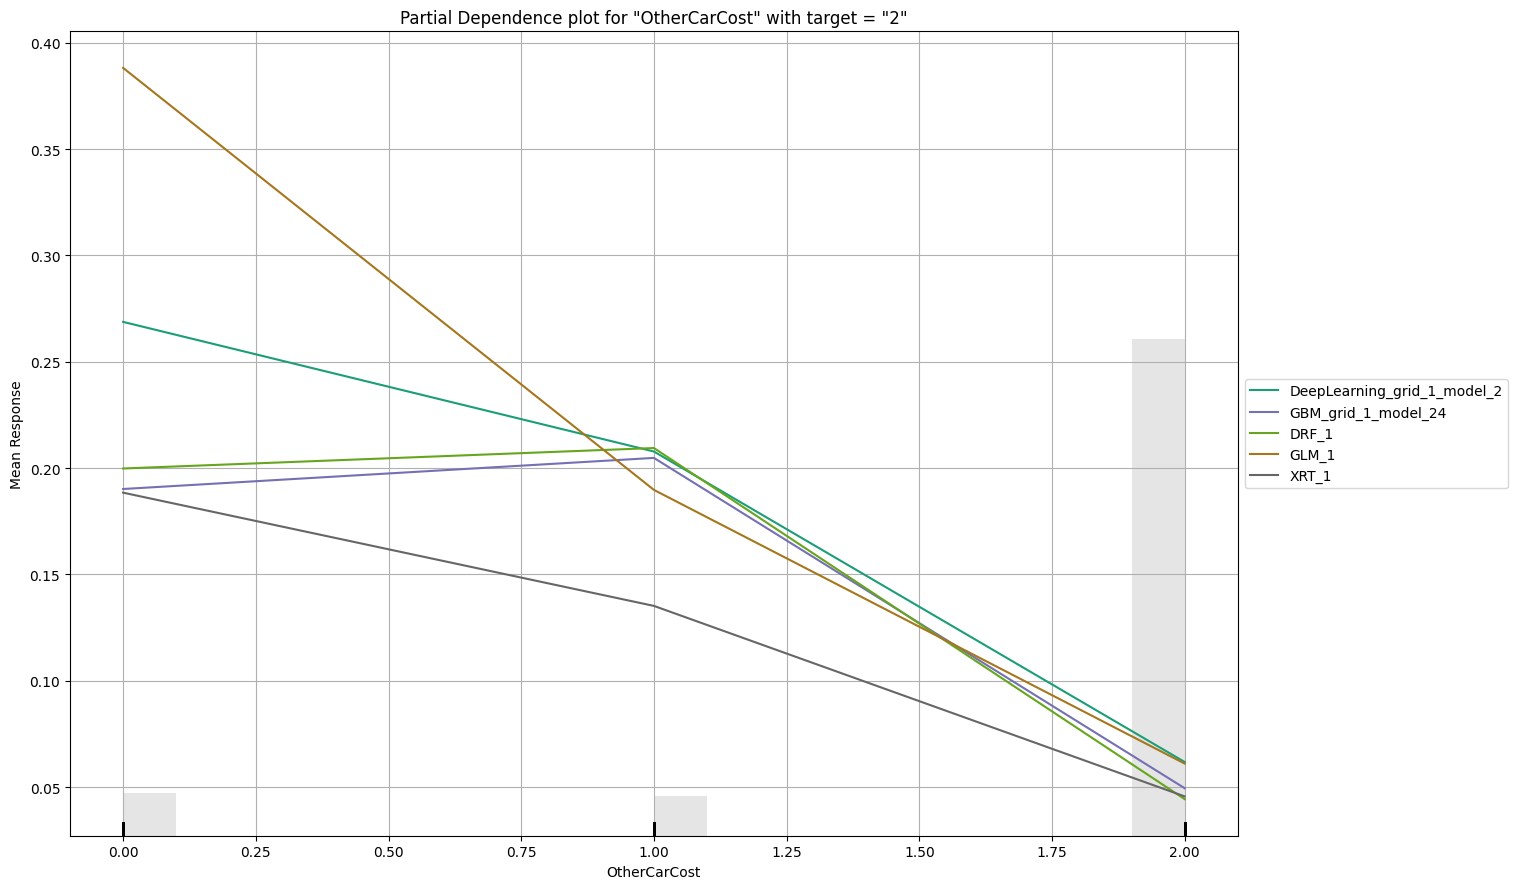

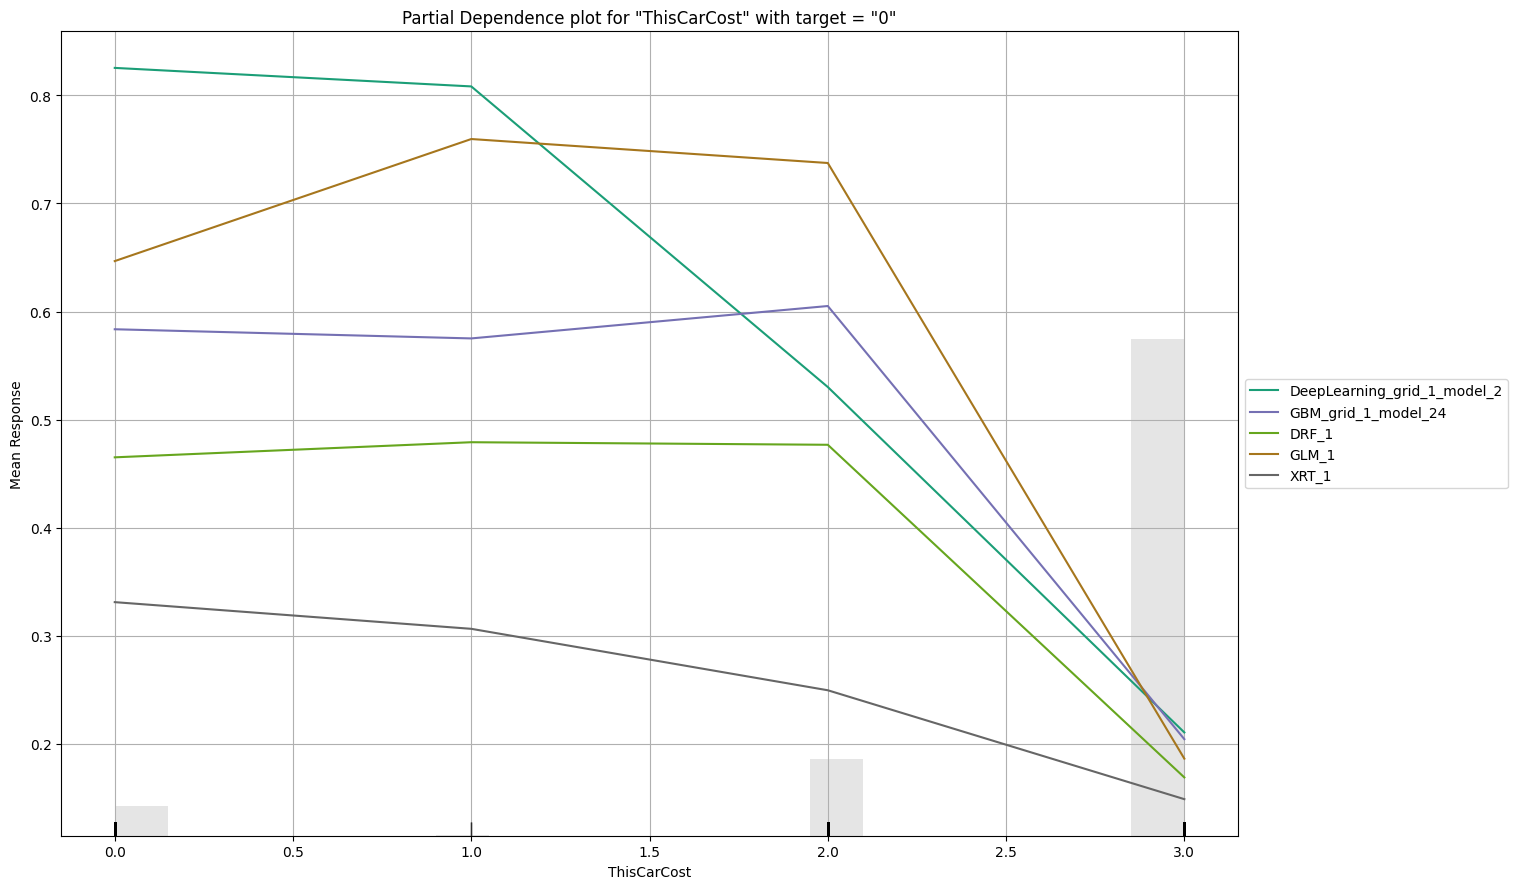

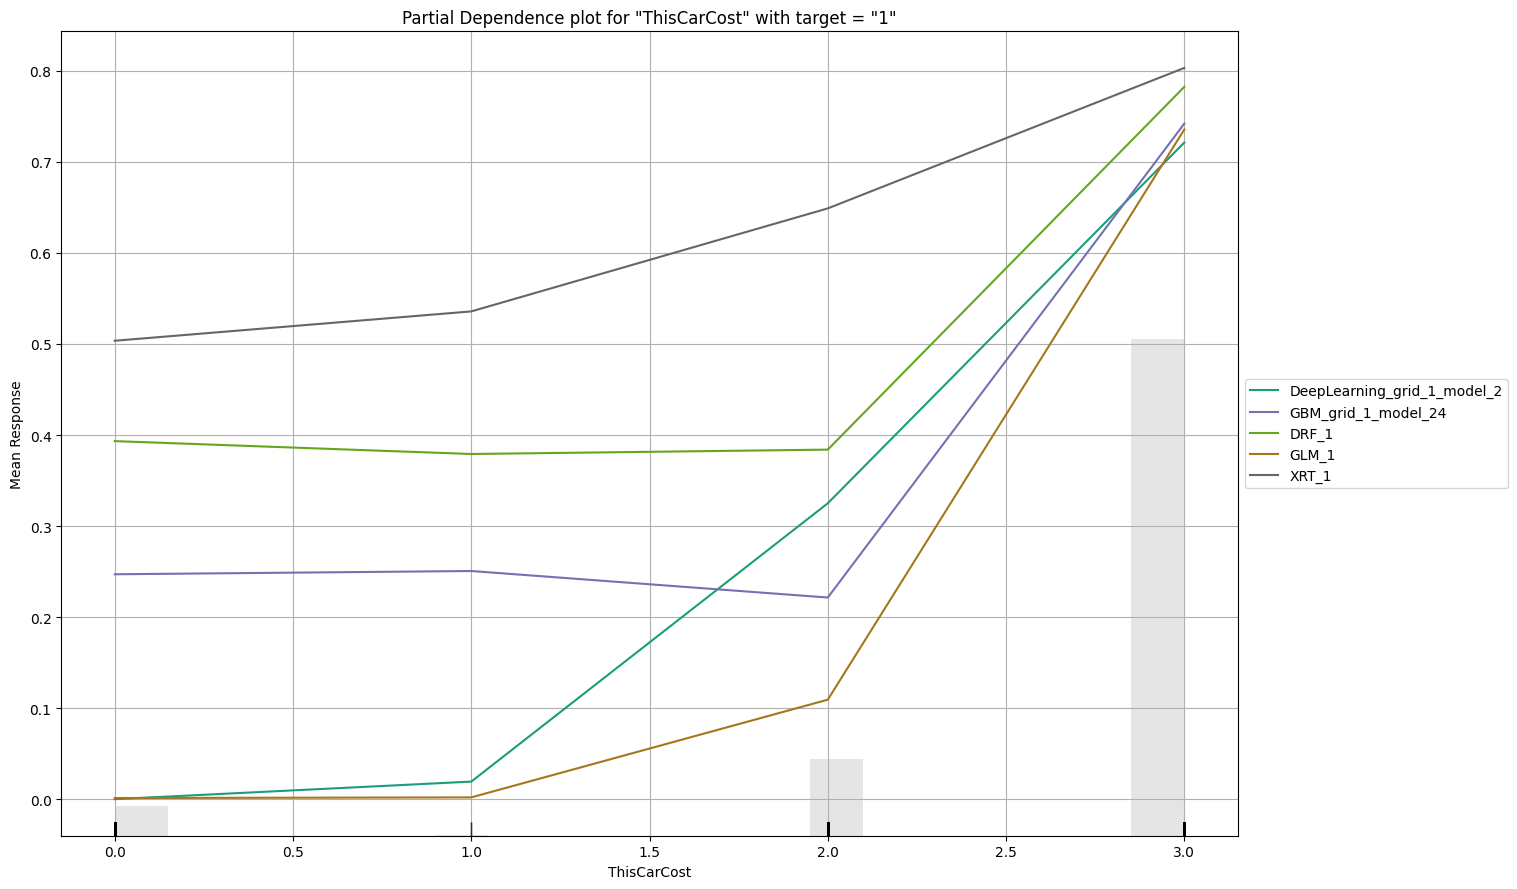

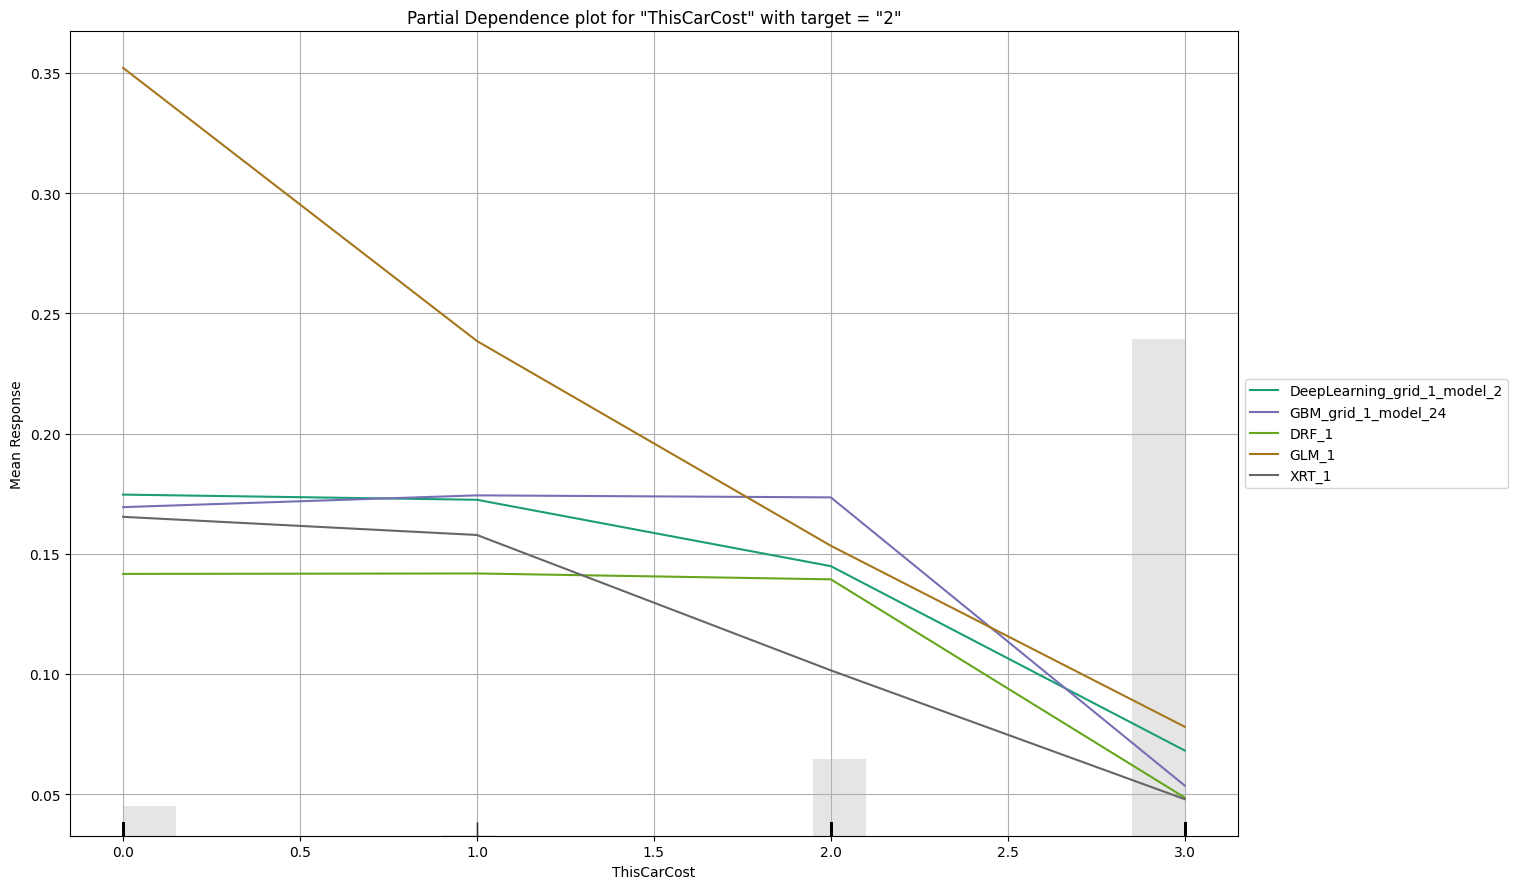

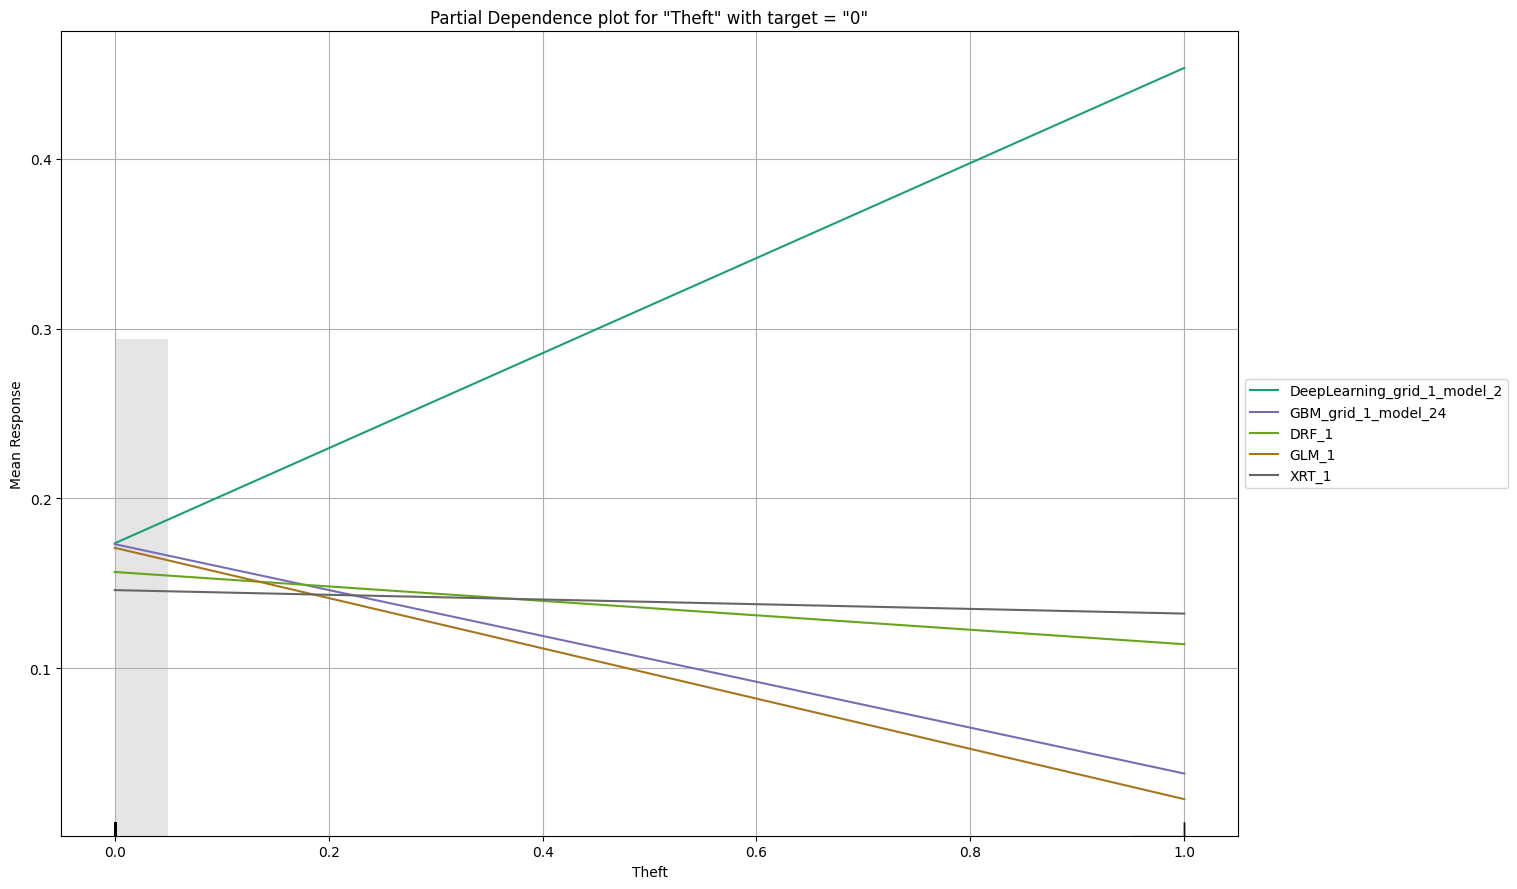

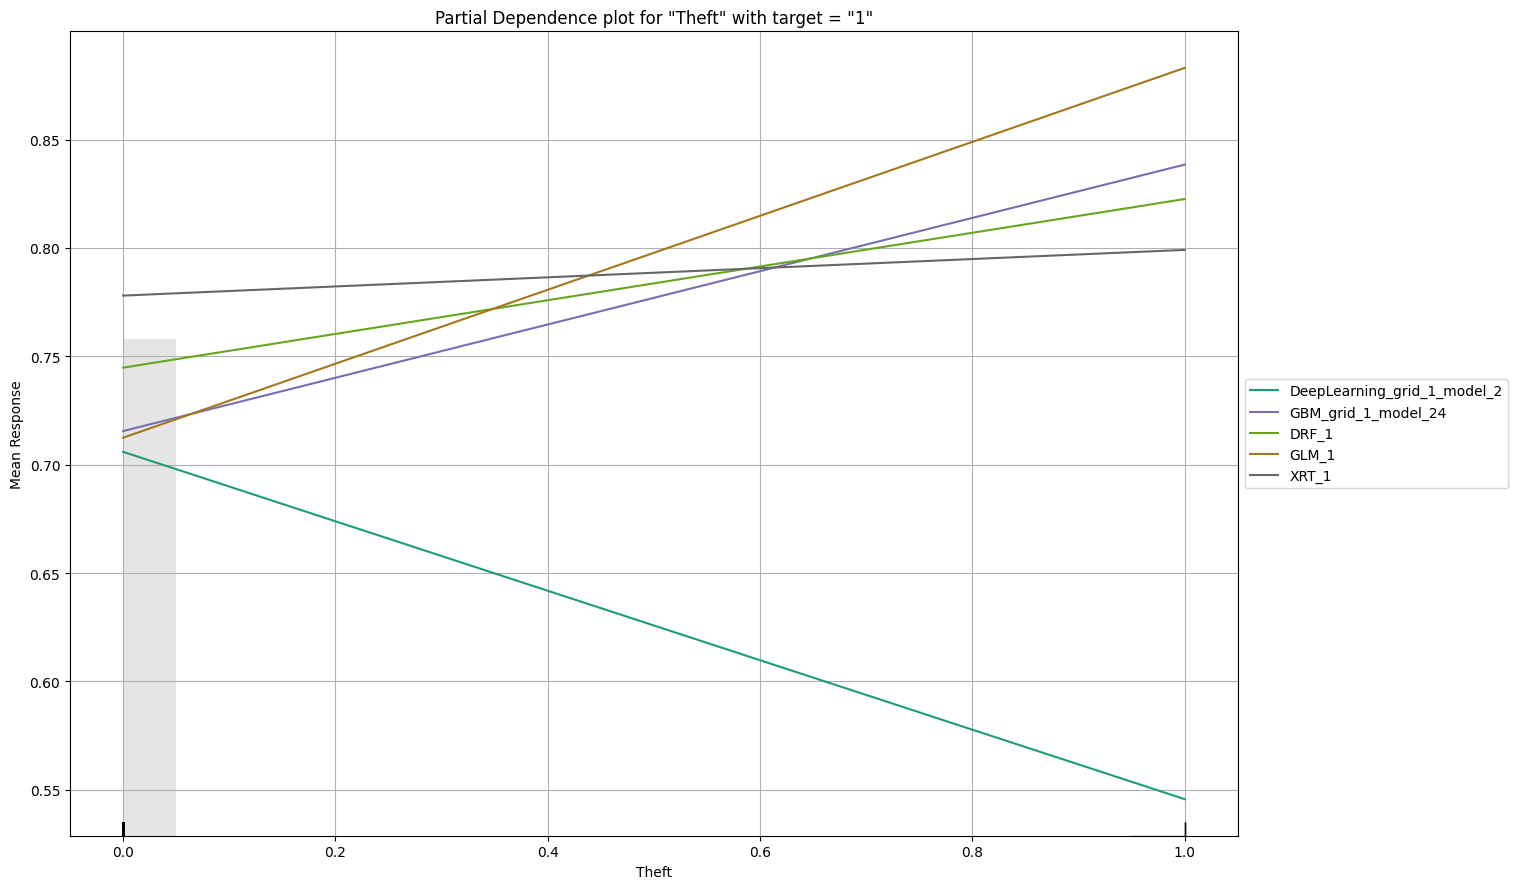

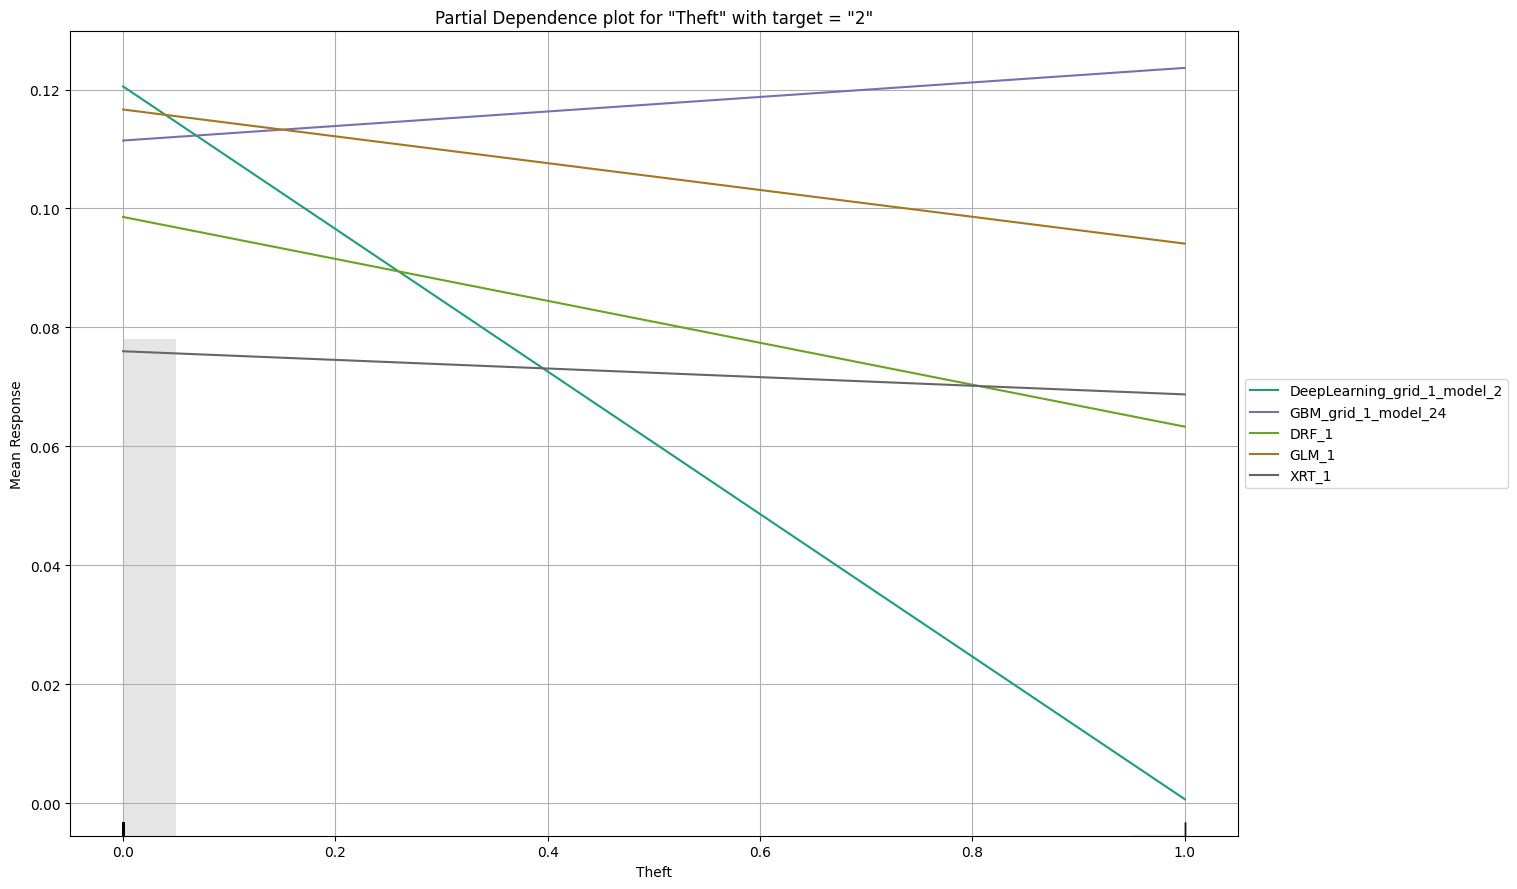

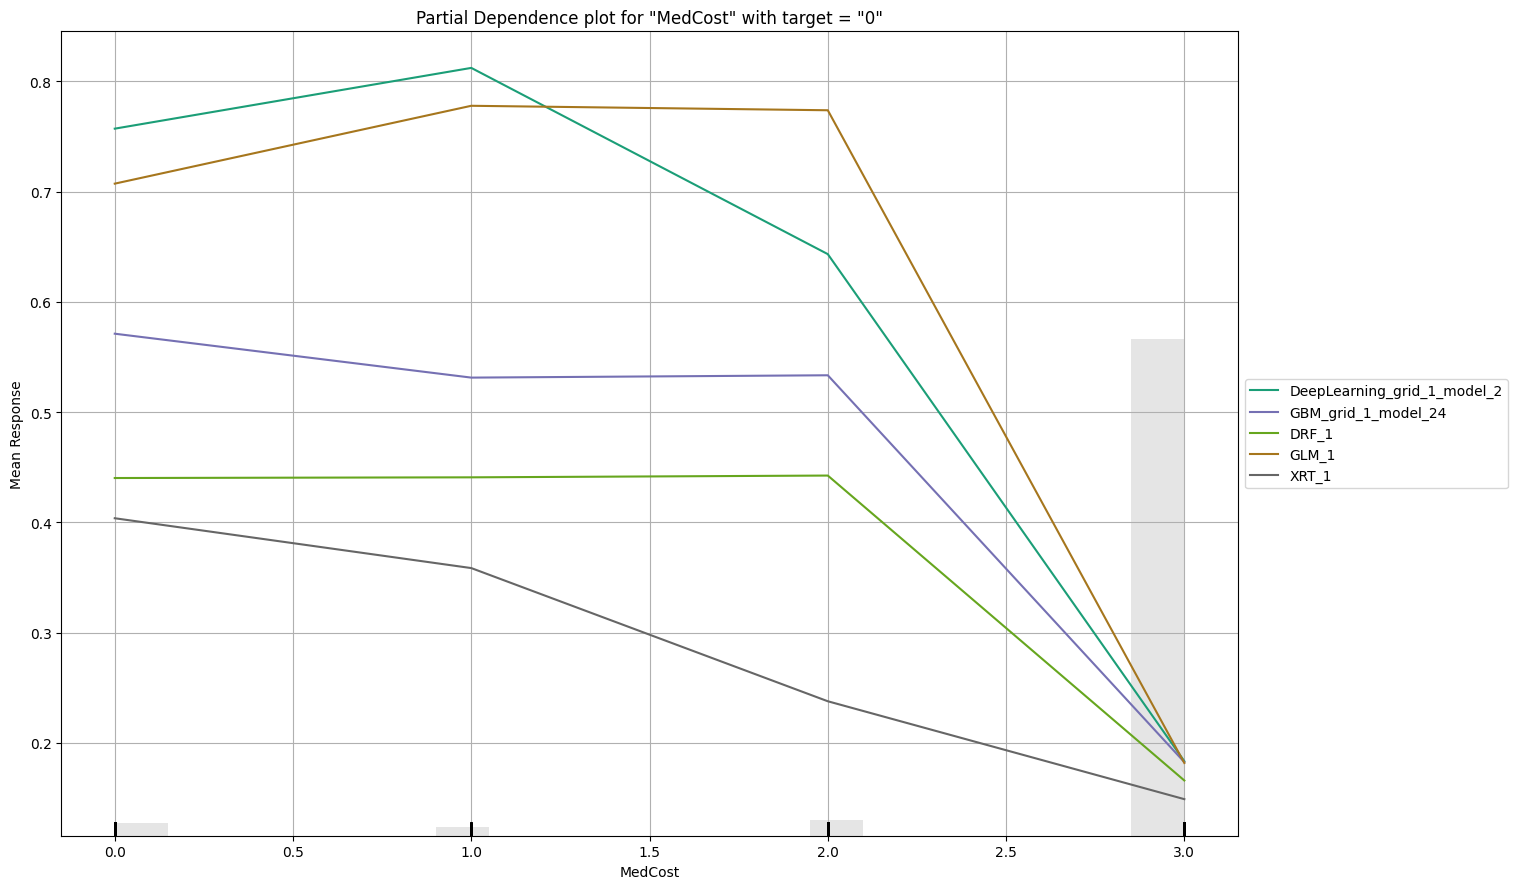

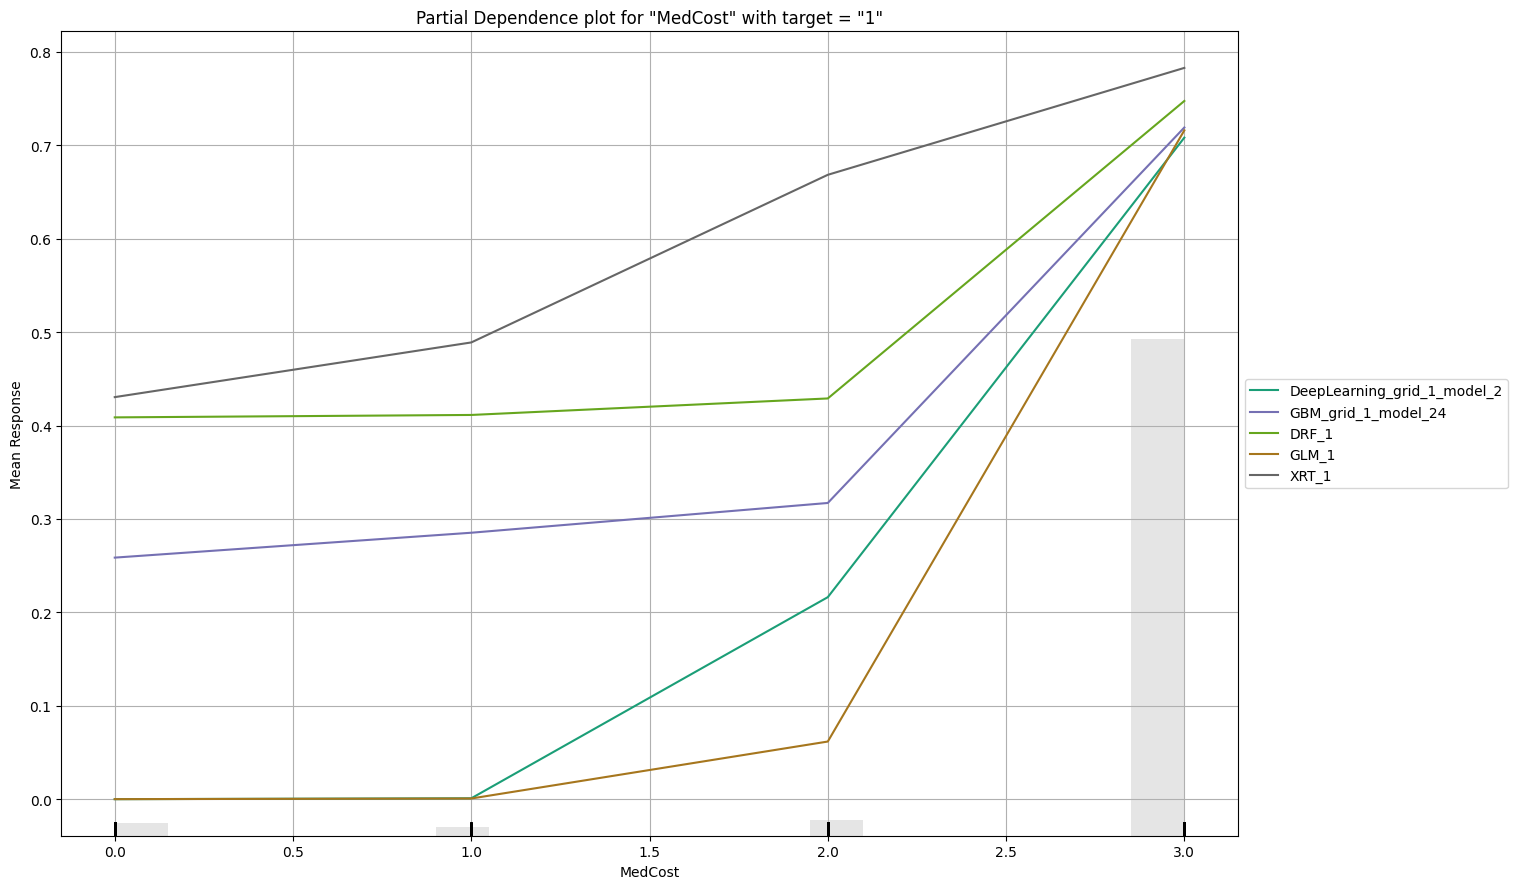

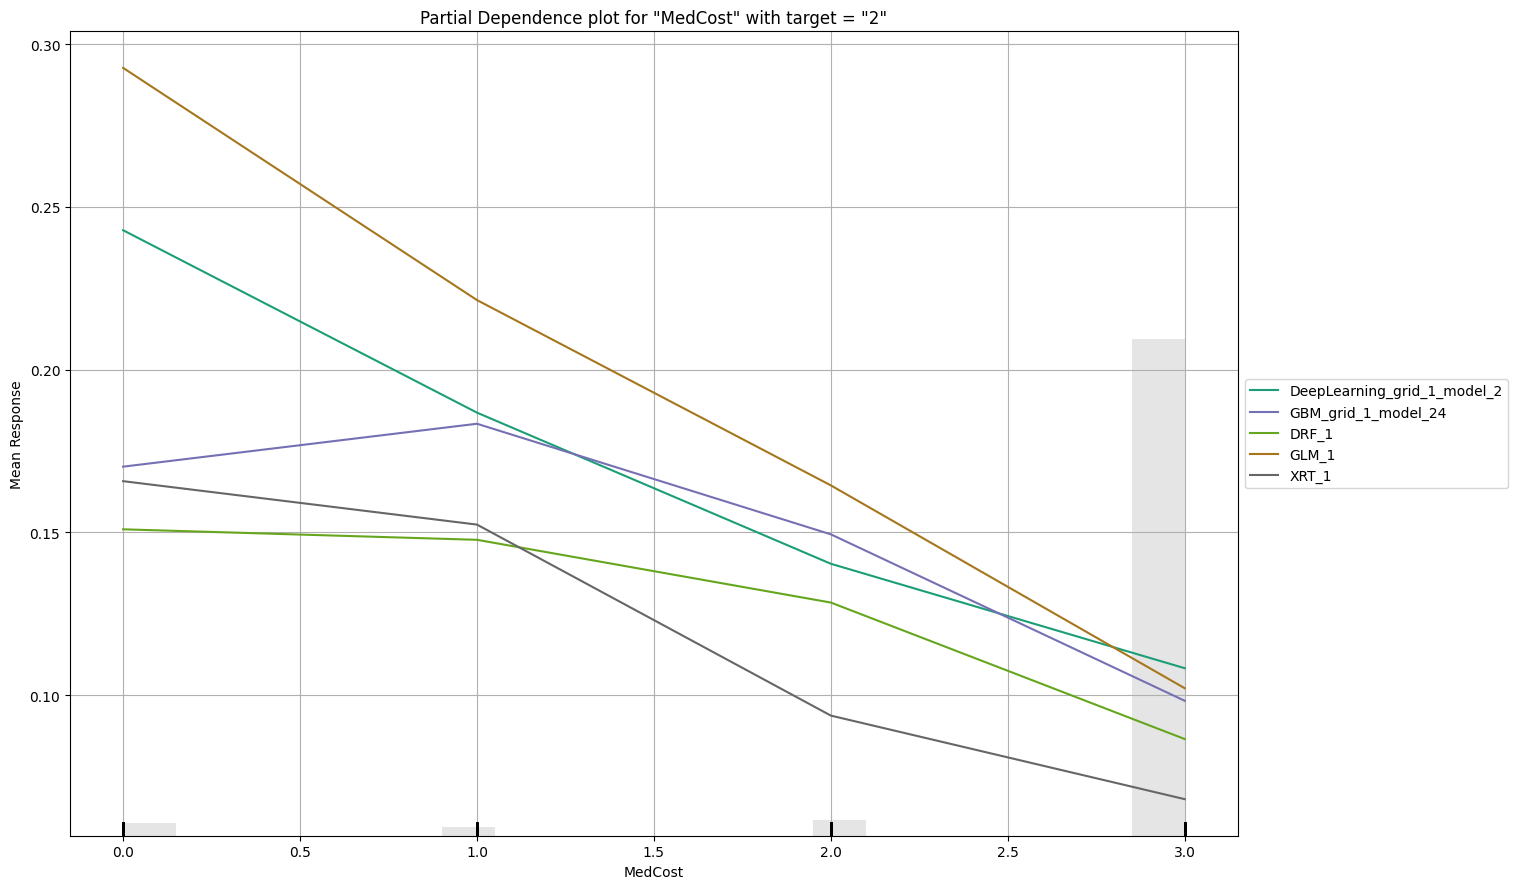

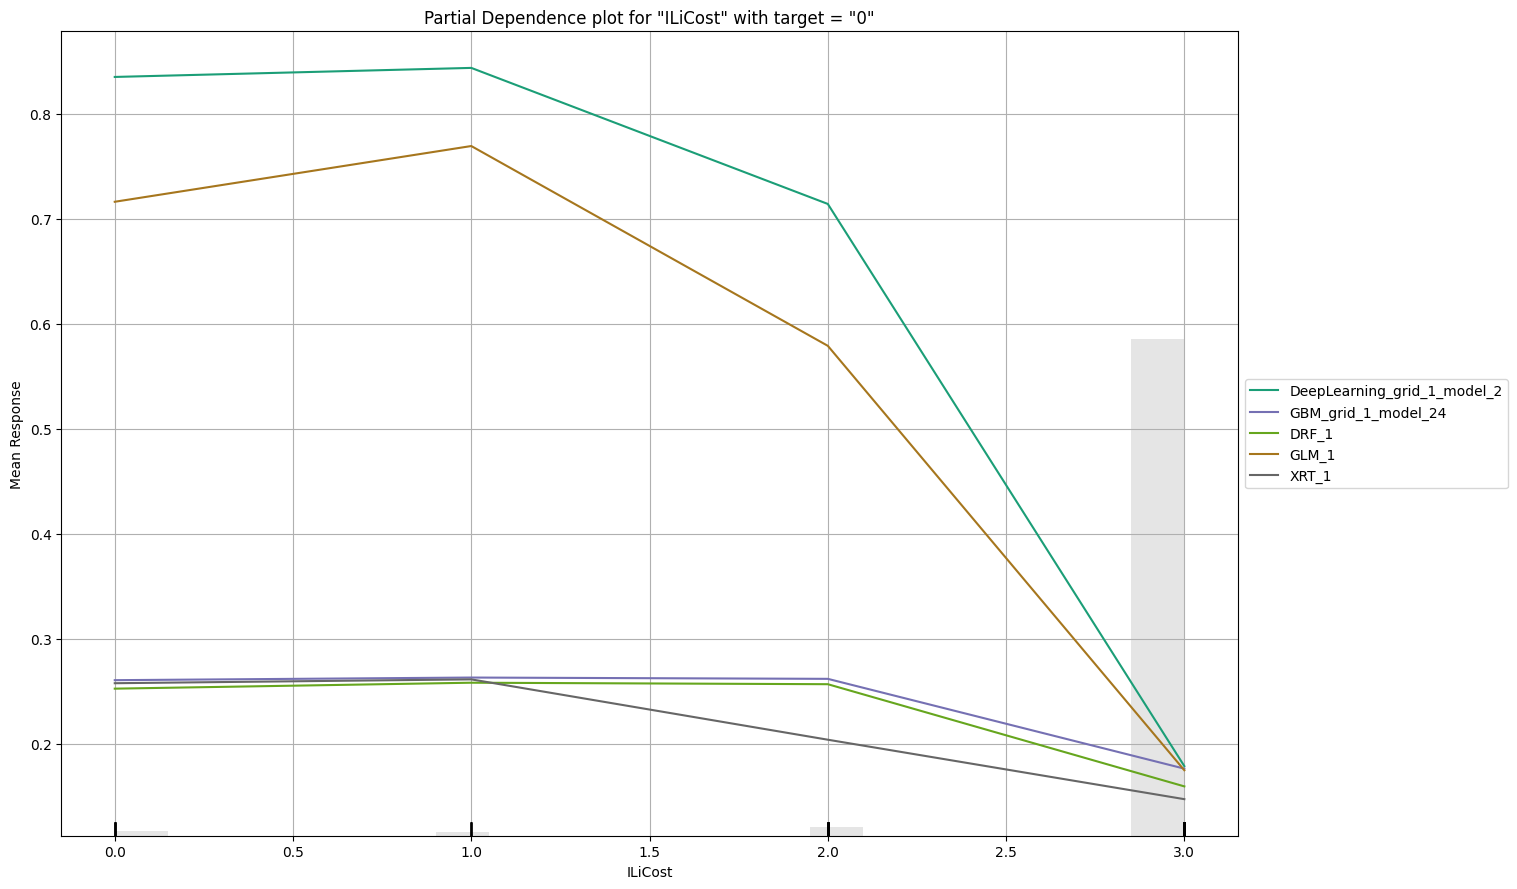

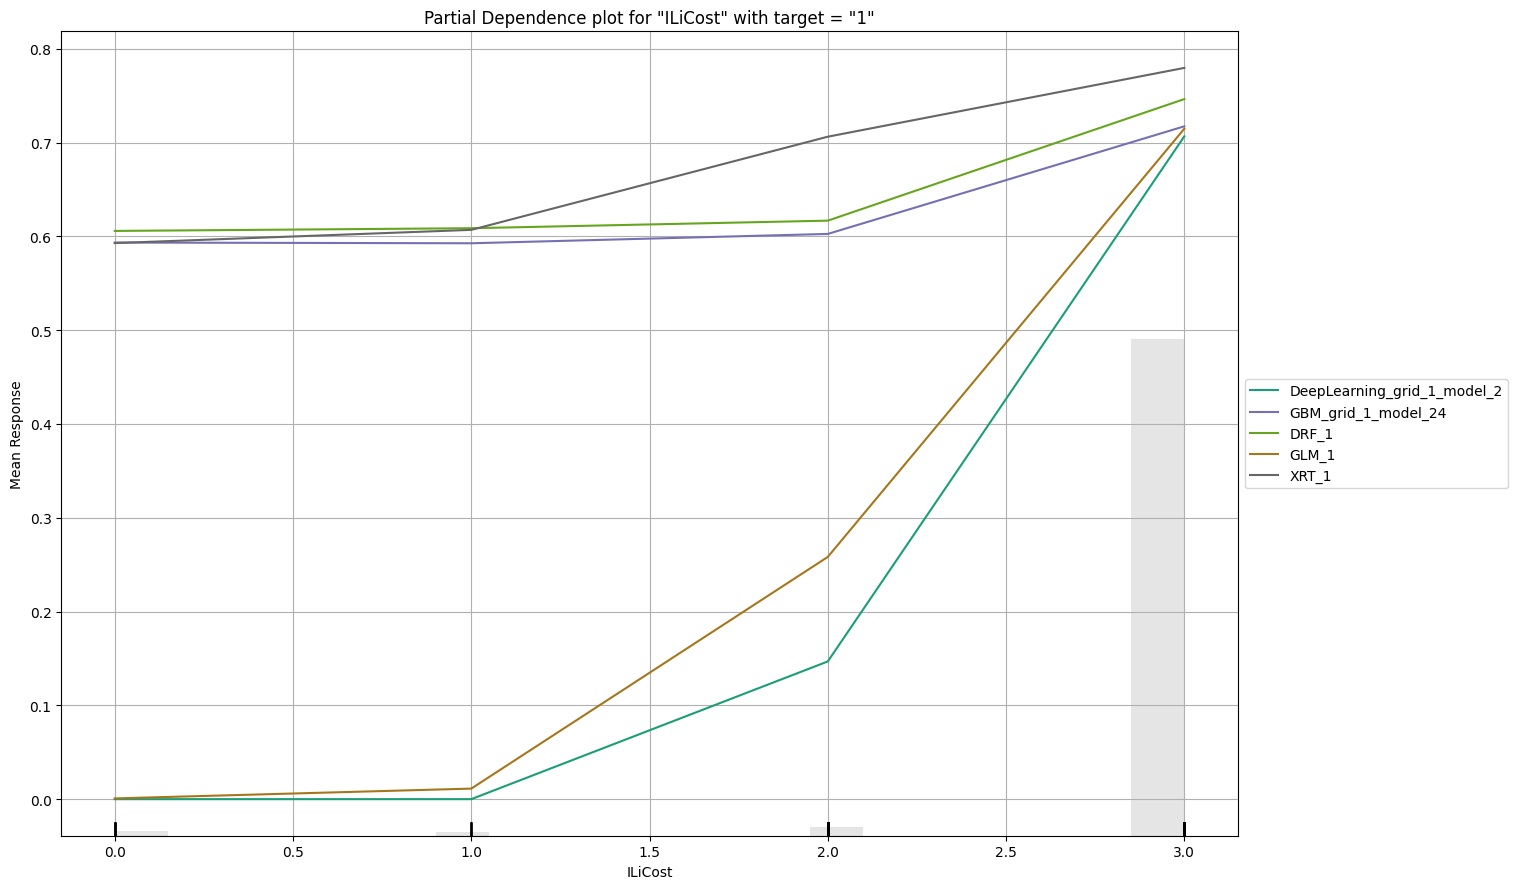

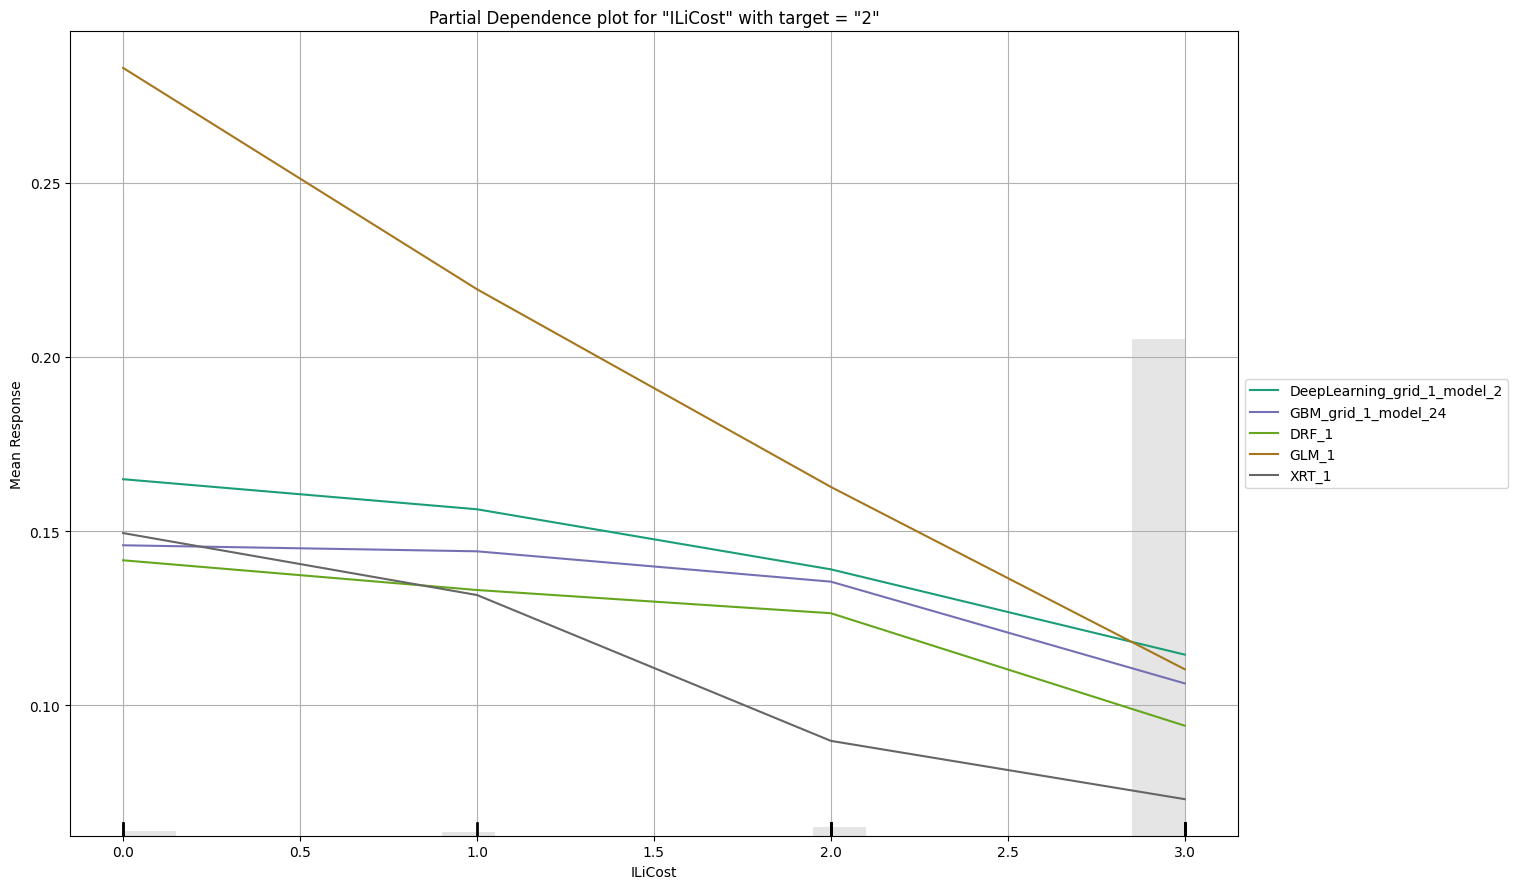

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ------------
DeepLearning_grid_1_AutoML_1_20250210_213036_model_2                0.241004   0.33597   0.311383  0.0969595               37258                   0.007297  DeepLearning
DeepLearning_grid_1_AutoML_1_20250210_213036_model_7                0.241187   0.424014  0.320304  0.102595                  799                   0.005159  DeepLearning
DeepLearning_grid_1_AutoML_1_20250210_213036_model_3                0.243573   0.305237  0.305522  0.0933436               22761                   0.006416  DeepLearning
GBM_grid_1_AutoML_1_20250210_213036_model_24                        0.253625   0.277715  0.296487  0.0879048                1873                   0.074661  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_3                         0.254455   0.279843  0.297763  0.0886627                1857                   0.175687  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_10                        0.254819   0.279318  0.297855  0.0887178                2055                   0.128296  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_20                        0.255197   0.279144  0.29688   0.0881374                2036                   0.05765   GBM
GBM_grid_1_AutoML_1_20250210_213036_model_15                        0.256471   0.279836  0.297049  0.0882383                1889                   0.056424  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_33                        0.25657    0.279133  0.297177  0.0883144                1943                   0.095653  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_26                        0.257266   0.278588  0.297098  0.0882673                1684                   0.047271  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_5                         0.257811   0.286787  0.302426  0.0914614                3015                   0.090694  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_23                        0.258109   0.290114  0.300334  0.0902005                9533                   0.066756  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_30                        0.258361   0.281938  0.298626  0.0891778                2200                   0.08002   GBM
GBM_grid_1_AutoML_1_20250210_213036_model_2                         0.258674   0.287479  0.300635  0.0903815                3797                   0.074829  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_13                        0.258923   0.283973  0.299065  0.0894401                3770                   0.072228  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_35                        0.260468   0.279038  0.295768  0.0874788                2497                   0.042049  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_7                         0.260613   0.285439  0.300174  0.0901042                2778                   0.056699  GBM
GBM_grid_1_AutoML_1_20250210_213036_model_21                        0.262462   0.278813  0.296091  0.0876699                2444                   0.055965  GBM
DeepLearning_1_AutoML_1_20250210_213036                             0.262944   0.292772  0.301918  0.0911545                1749                   0.006432  DeepLearning
GBM_grid_1_AutoML_1_20250210_213036_model_12                        0.263092   0.278584  0.296157  0.0877093                2849                   0.051531  GBM
[20 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_1_20250210_213036_model_2

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2    Error      Rate
---  ----  ---  ---------  -----------
452  272   217  0.51966    489 / 941
257  4034  0    0.0598928  257 / 4.291
101  1     609  0.14346    102 / 711
810  4307  826  0.142689   848 / 5.943

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

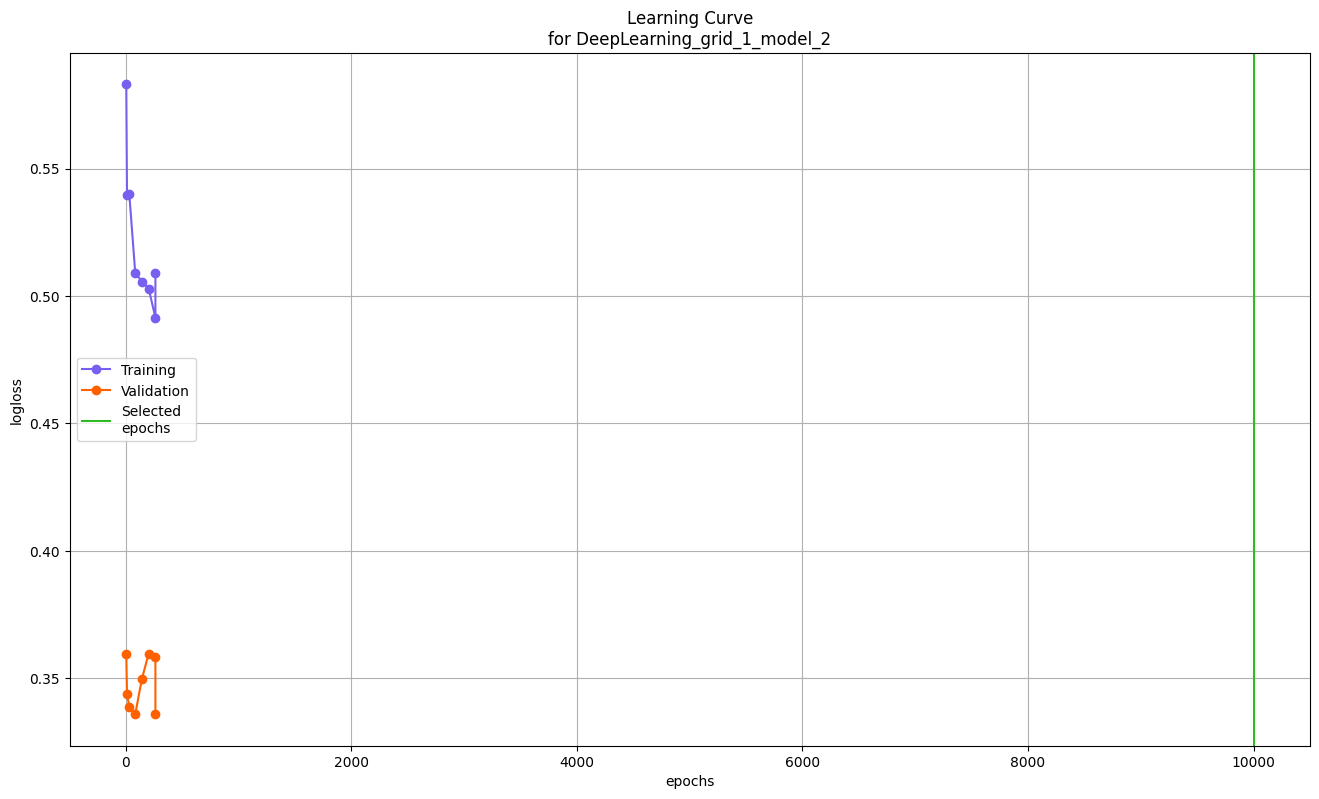

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

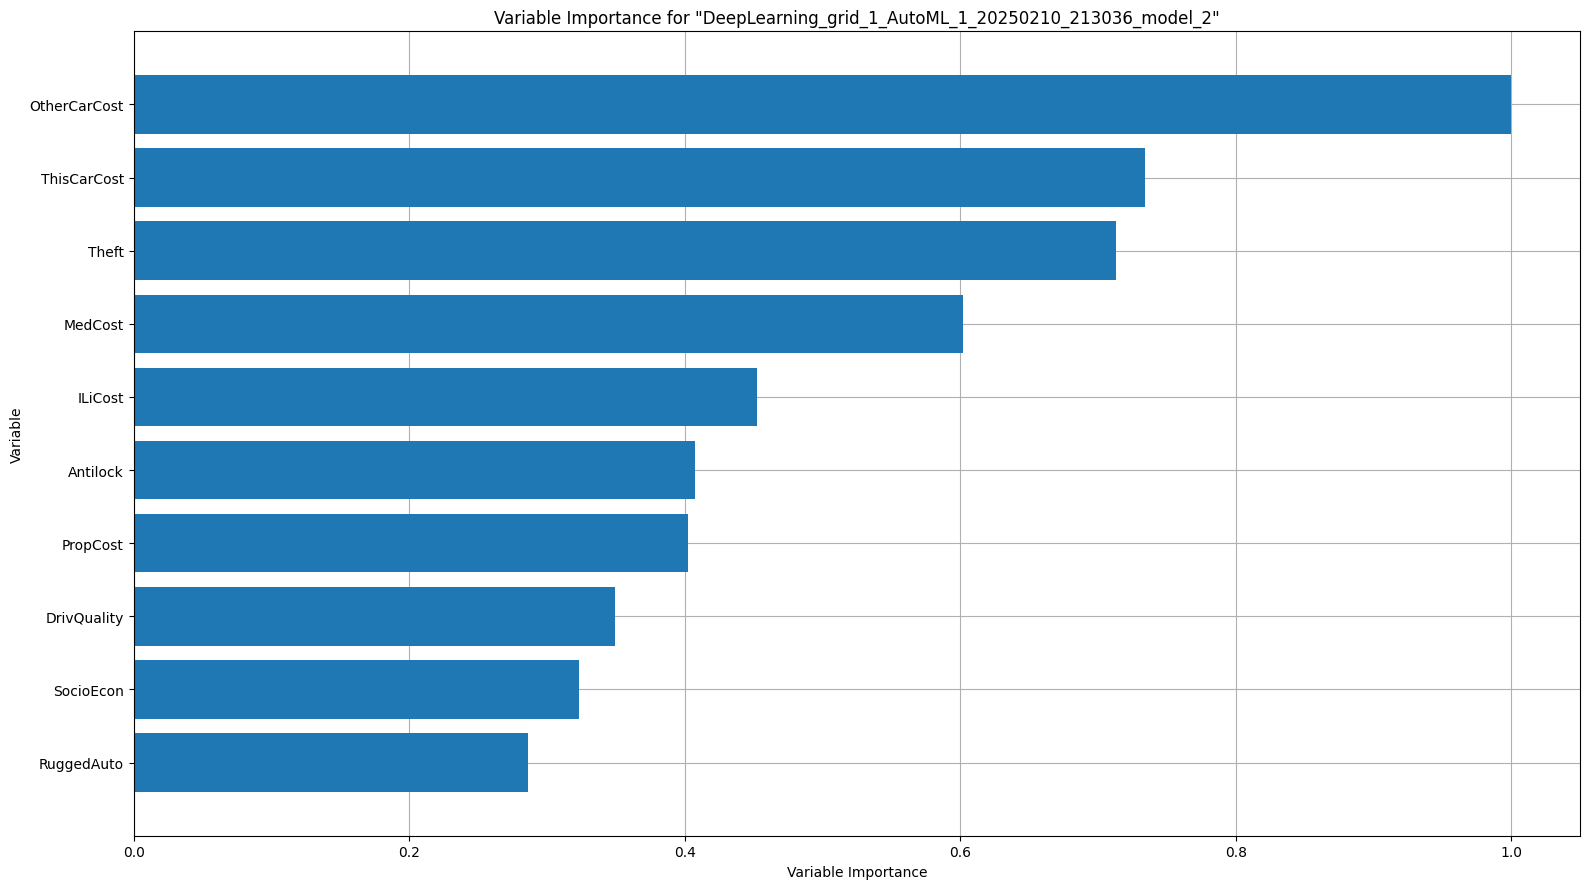

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

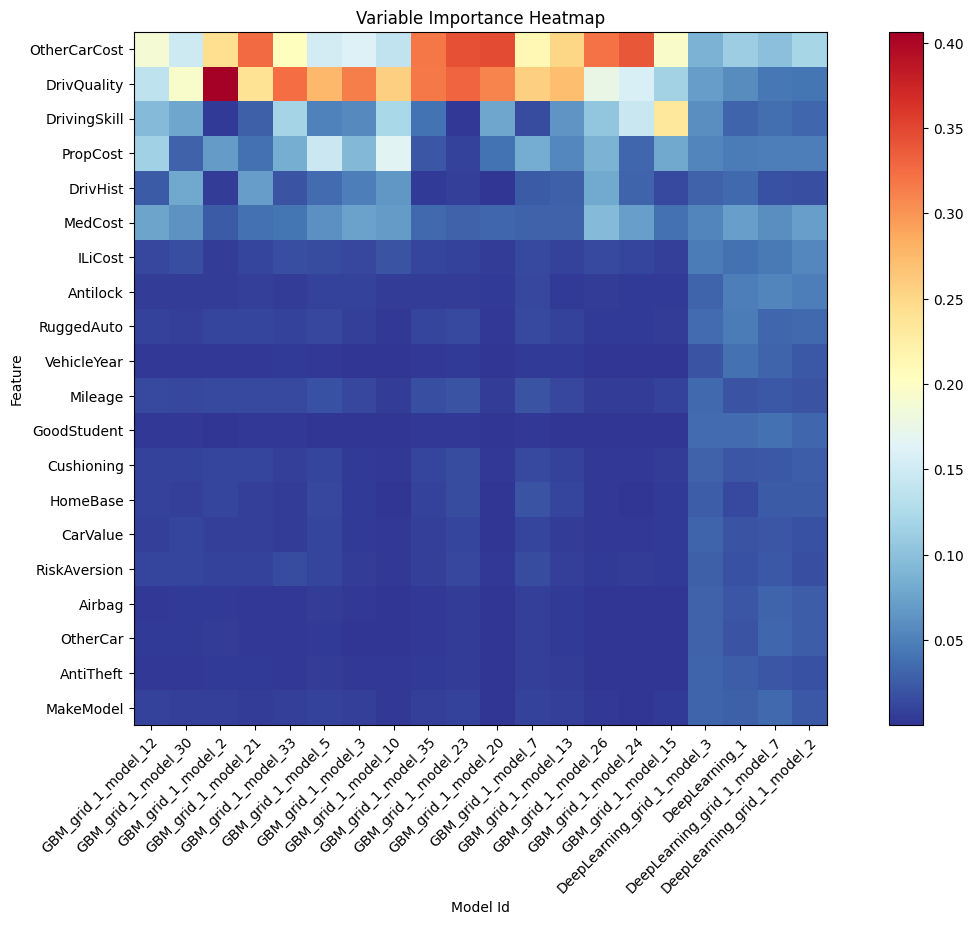

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

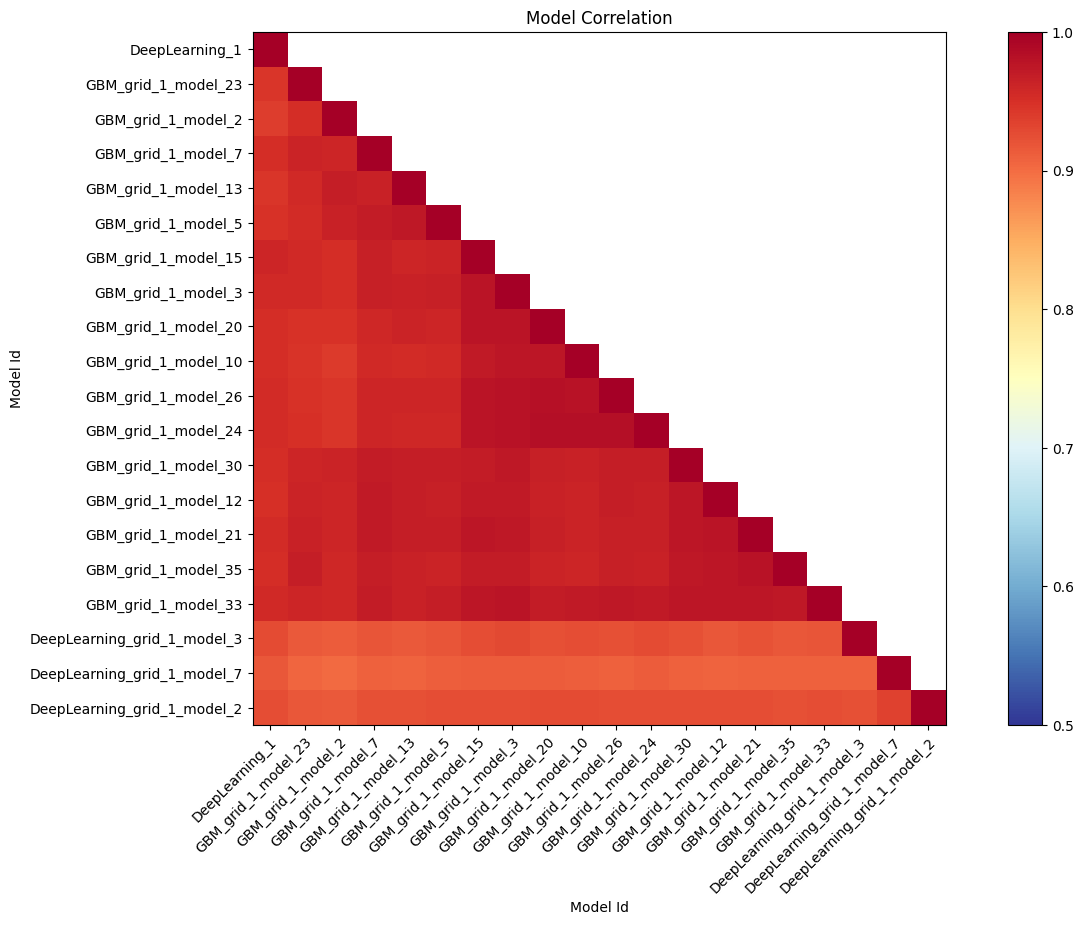

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

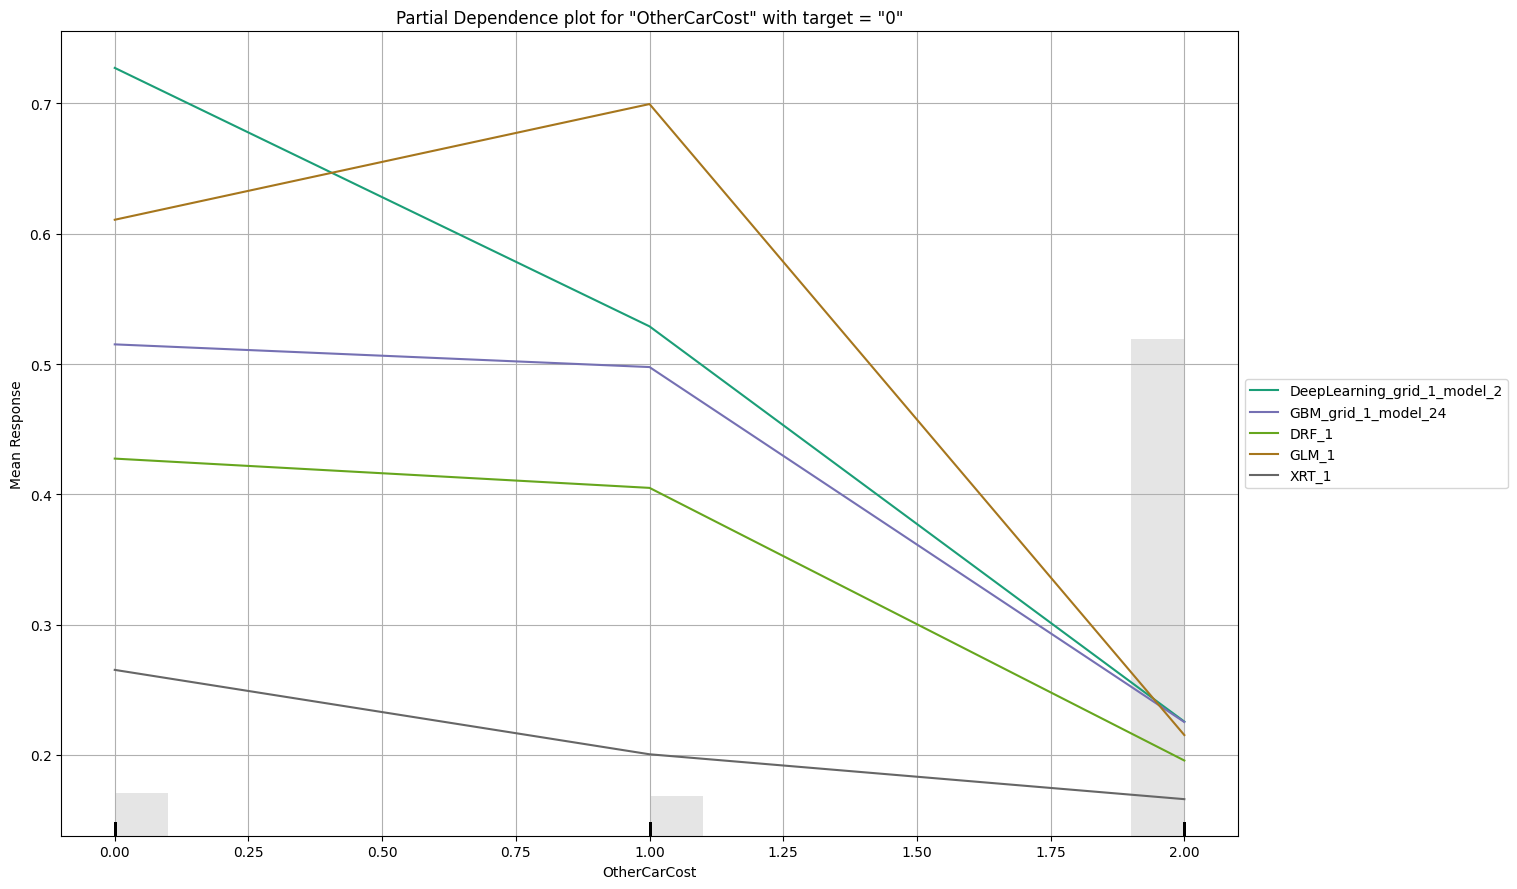

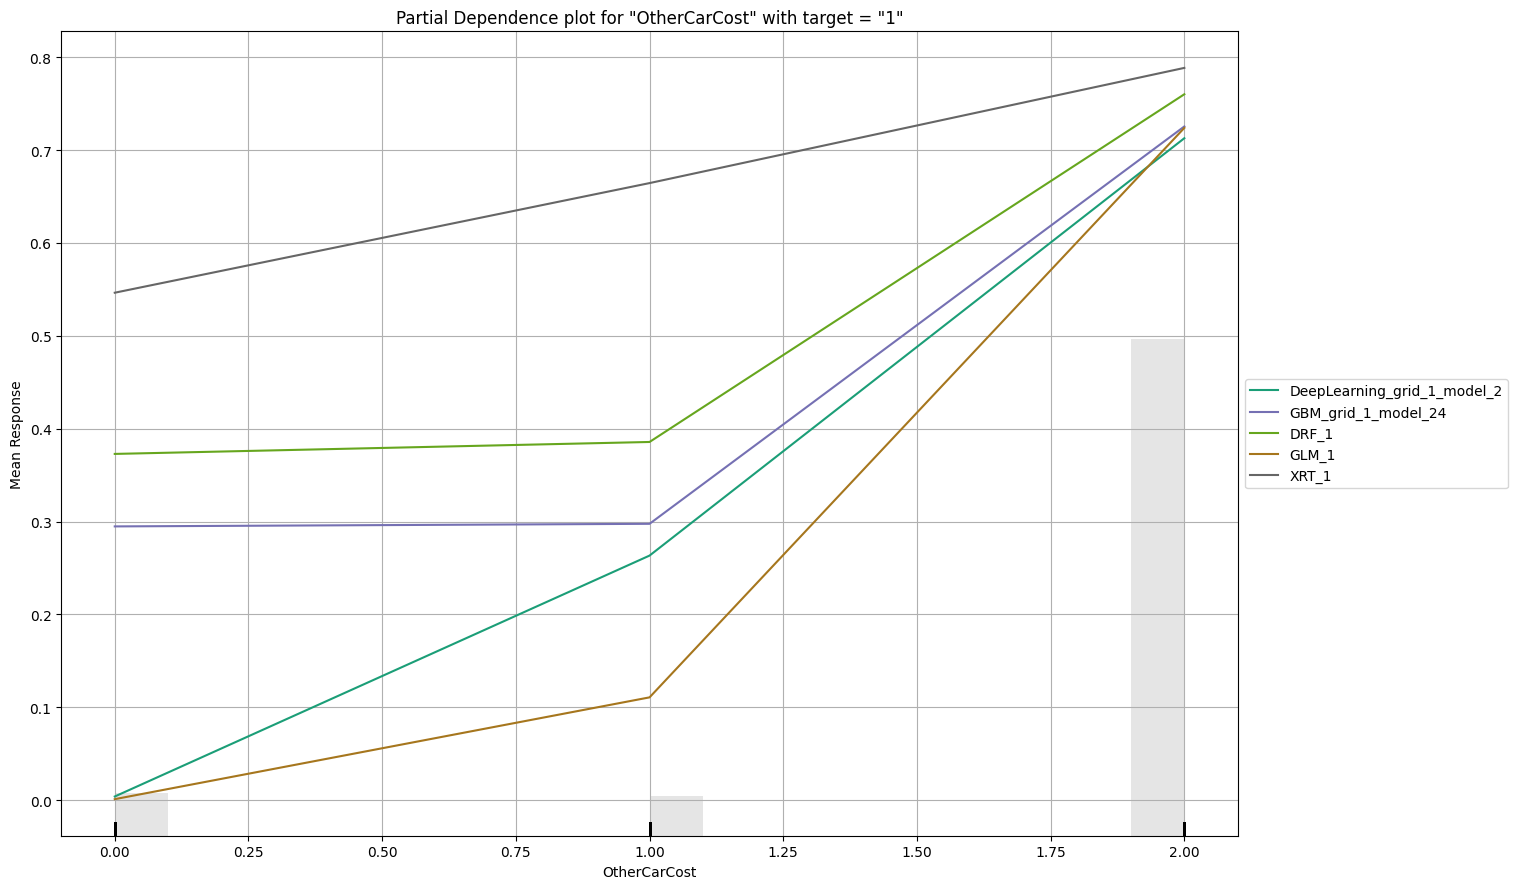

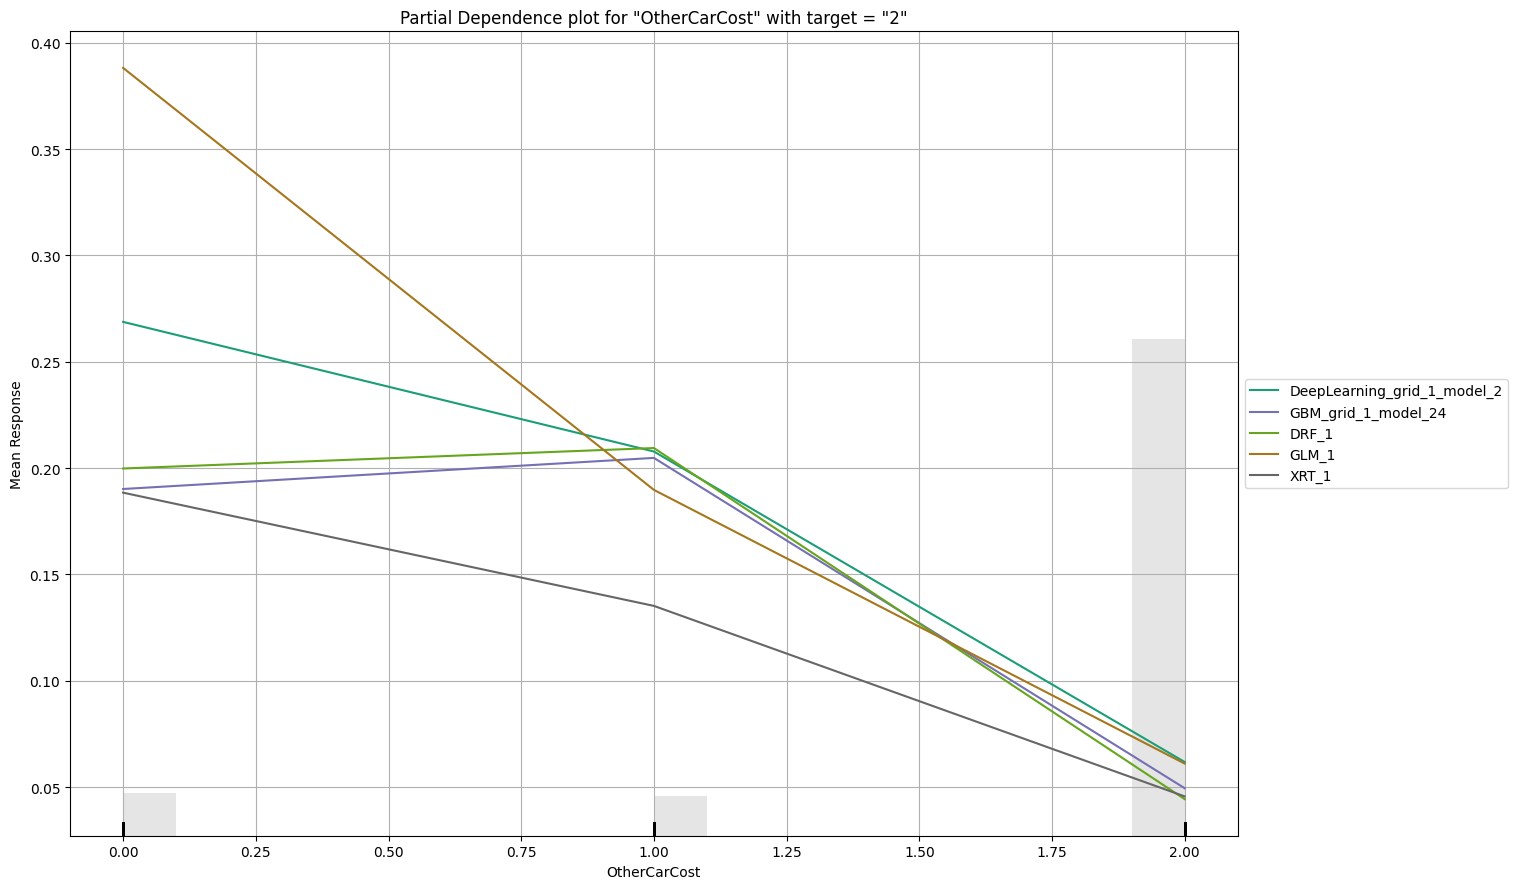

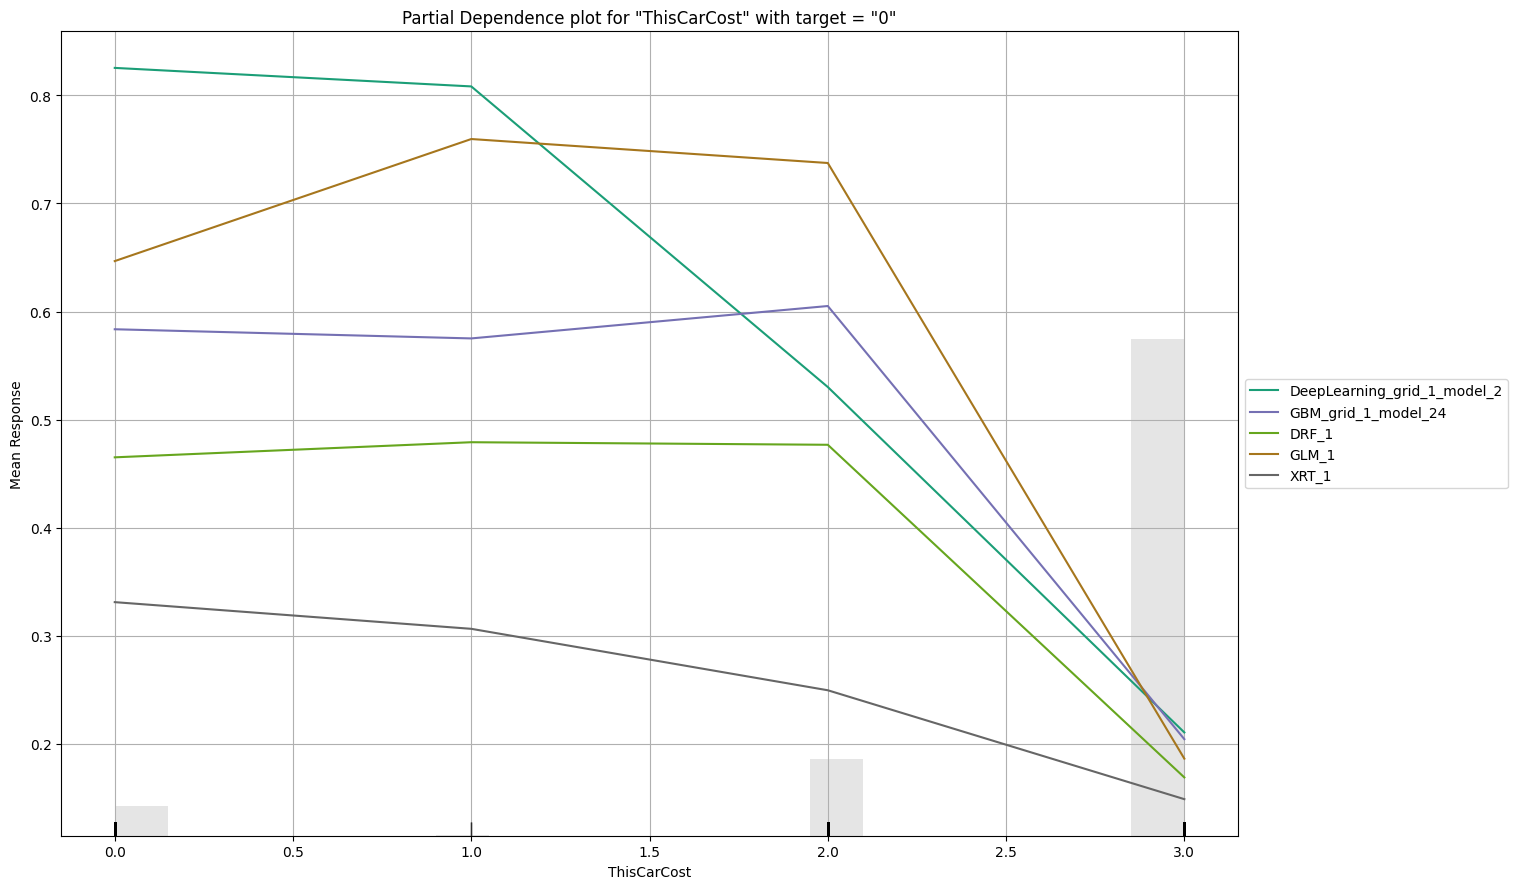

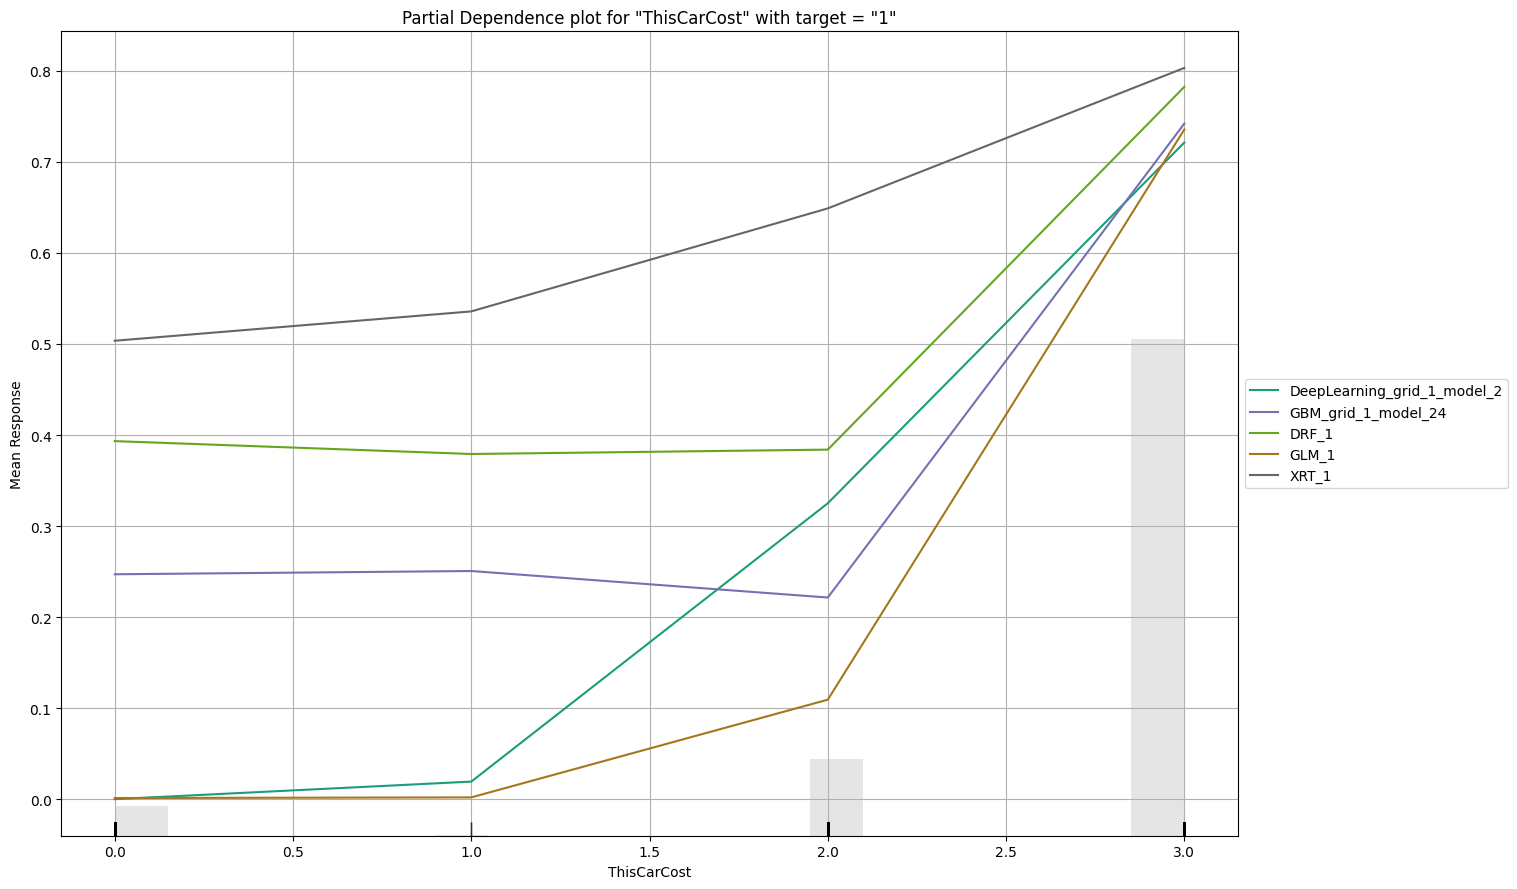

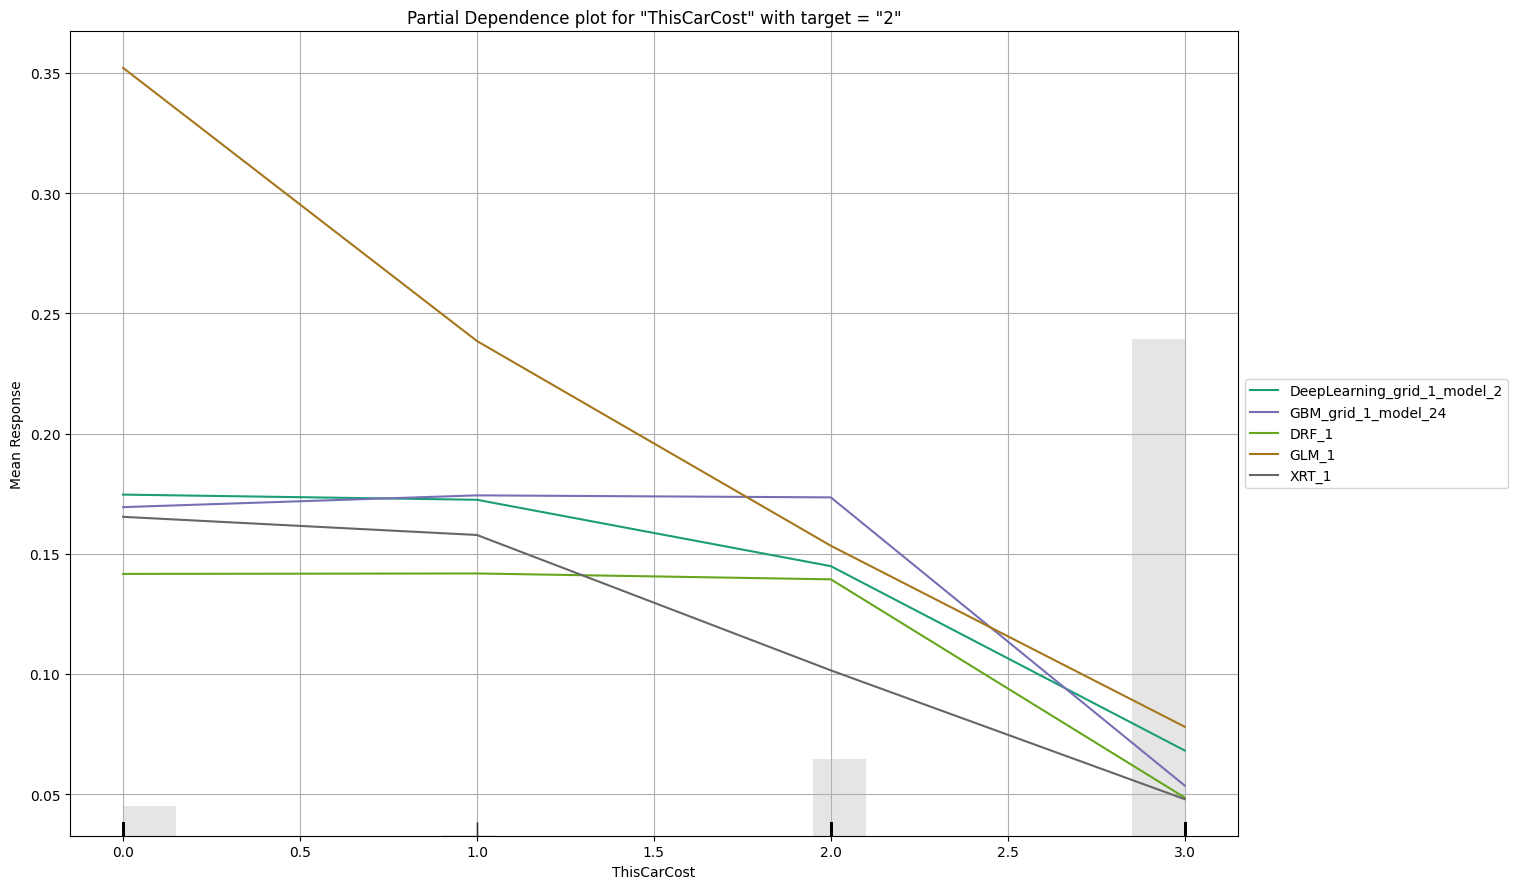

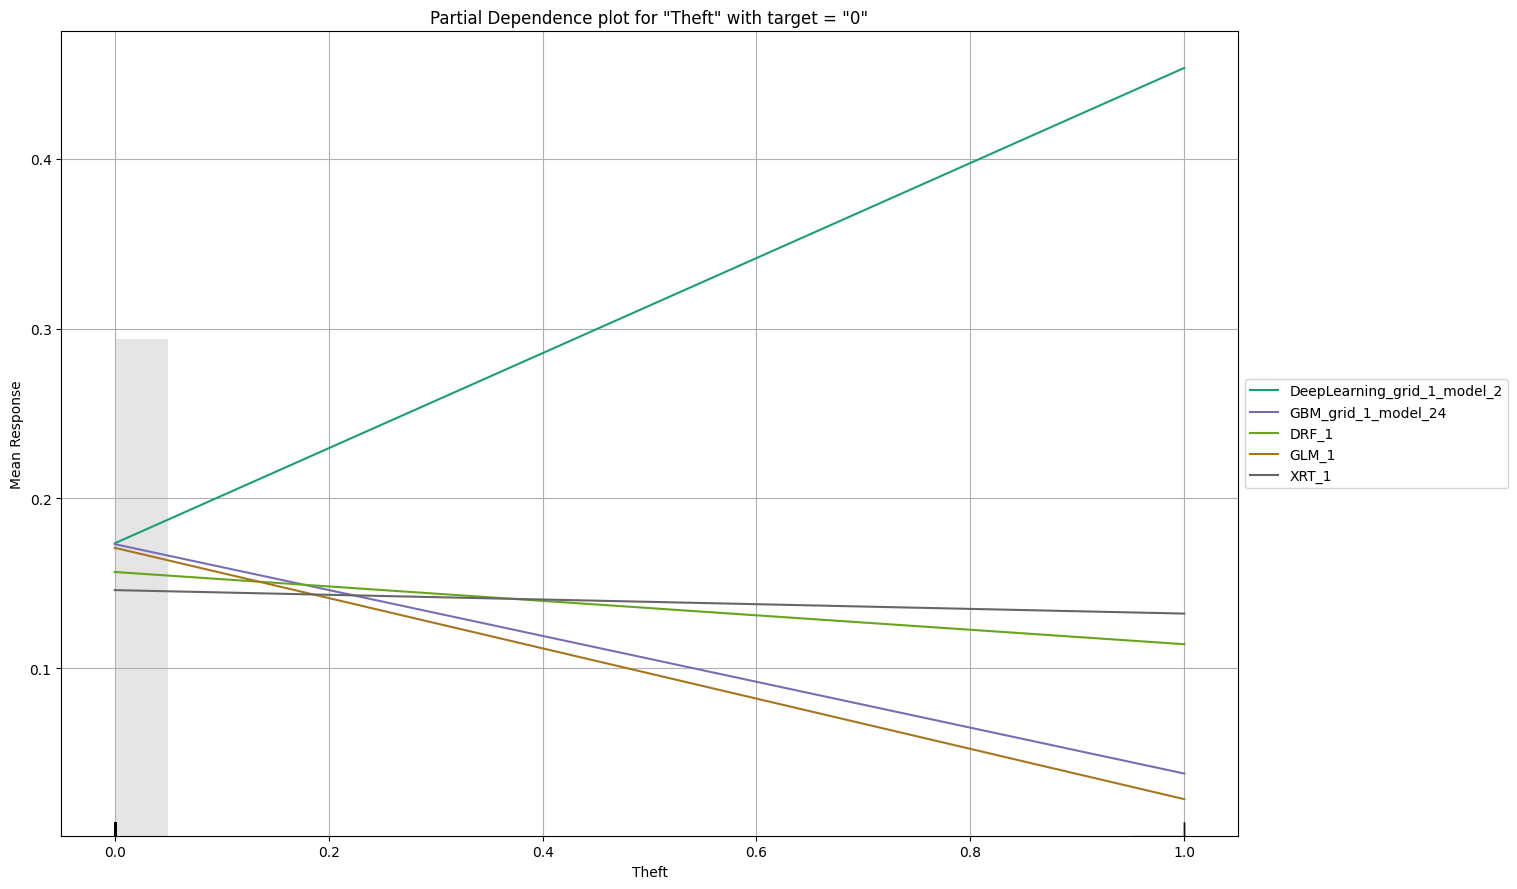

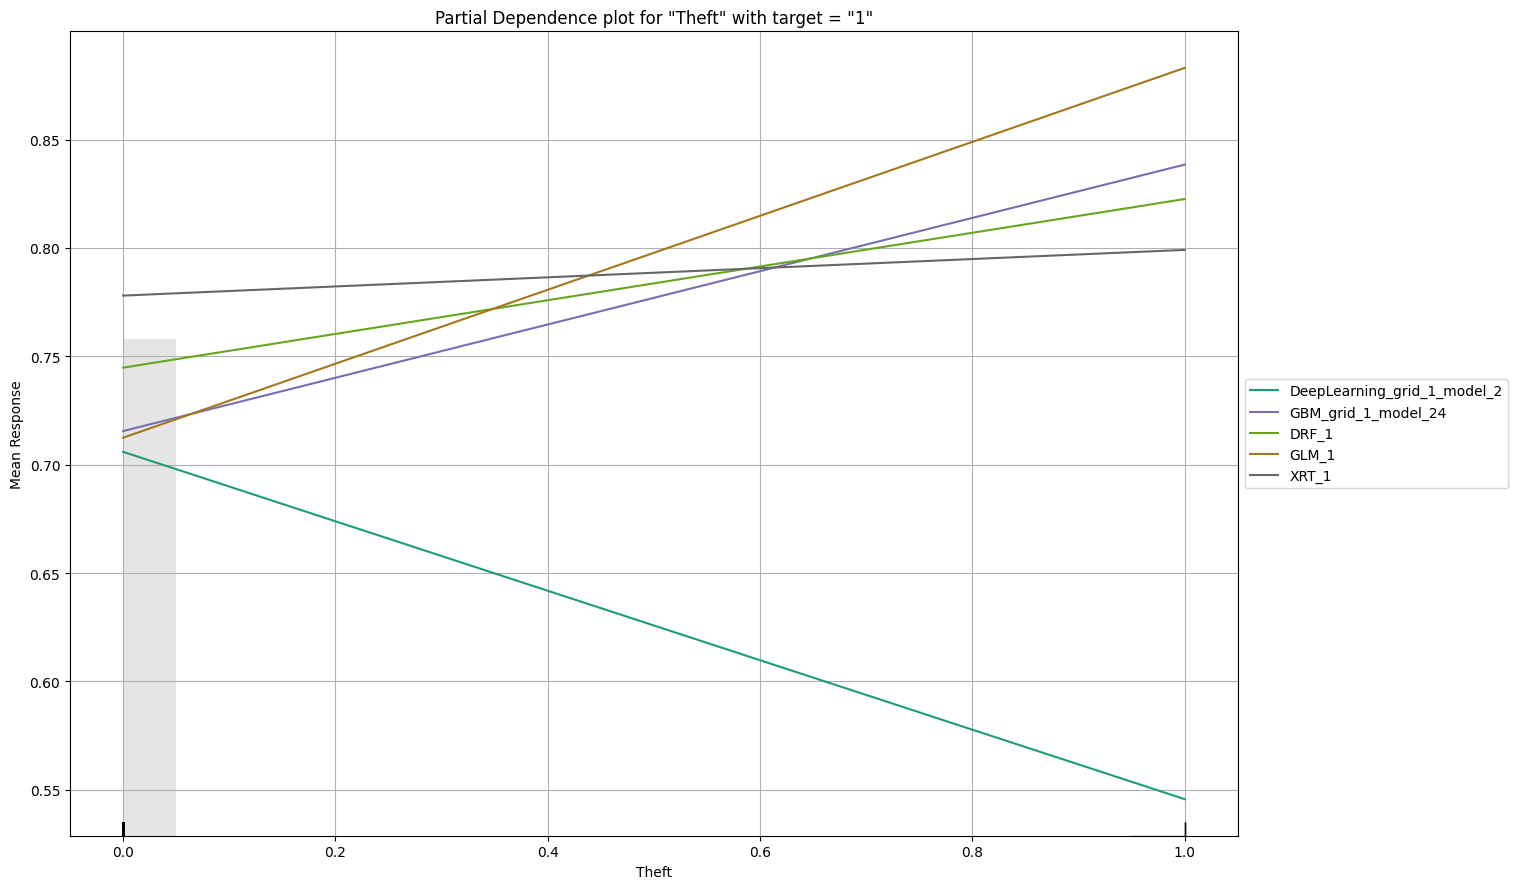

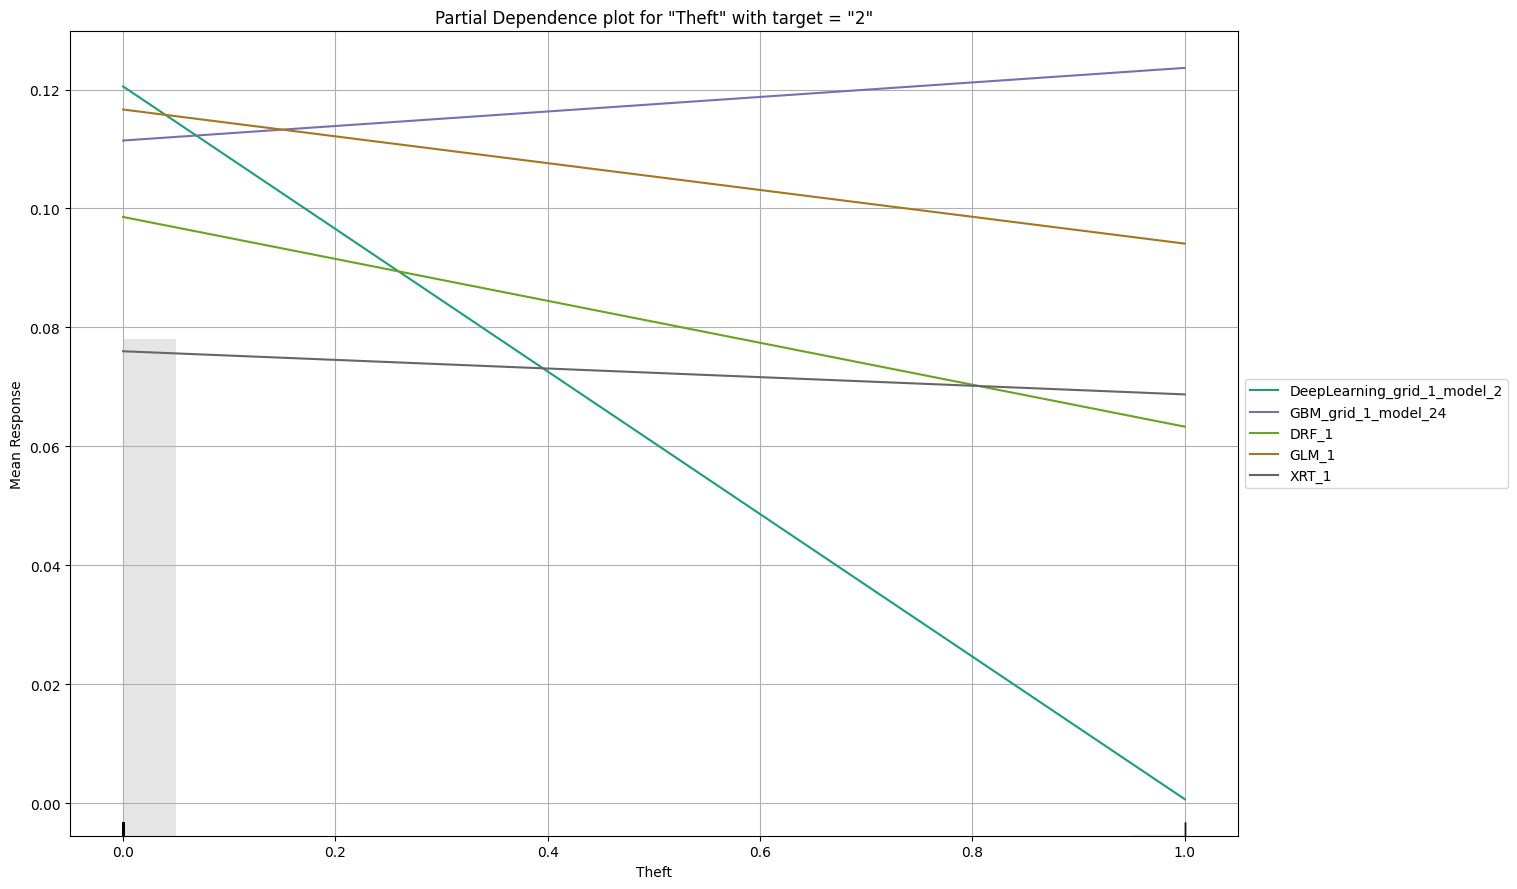

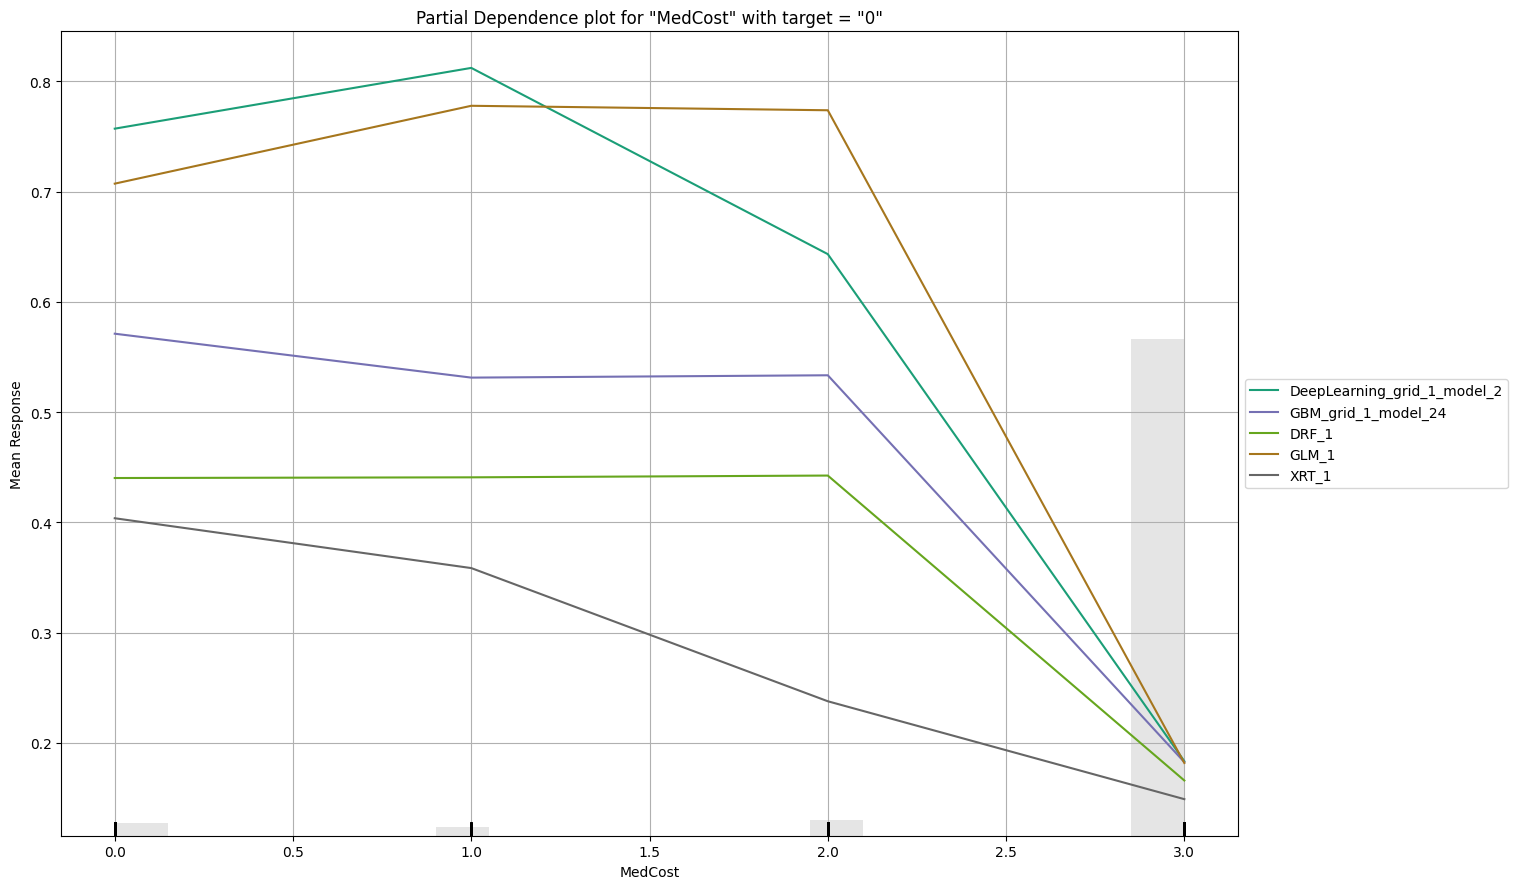

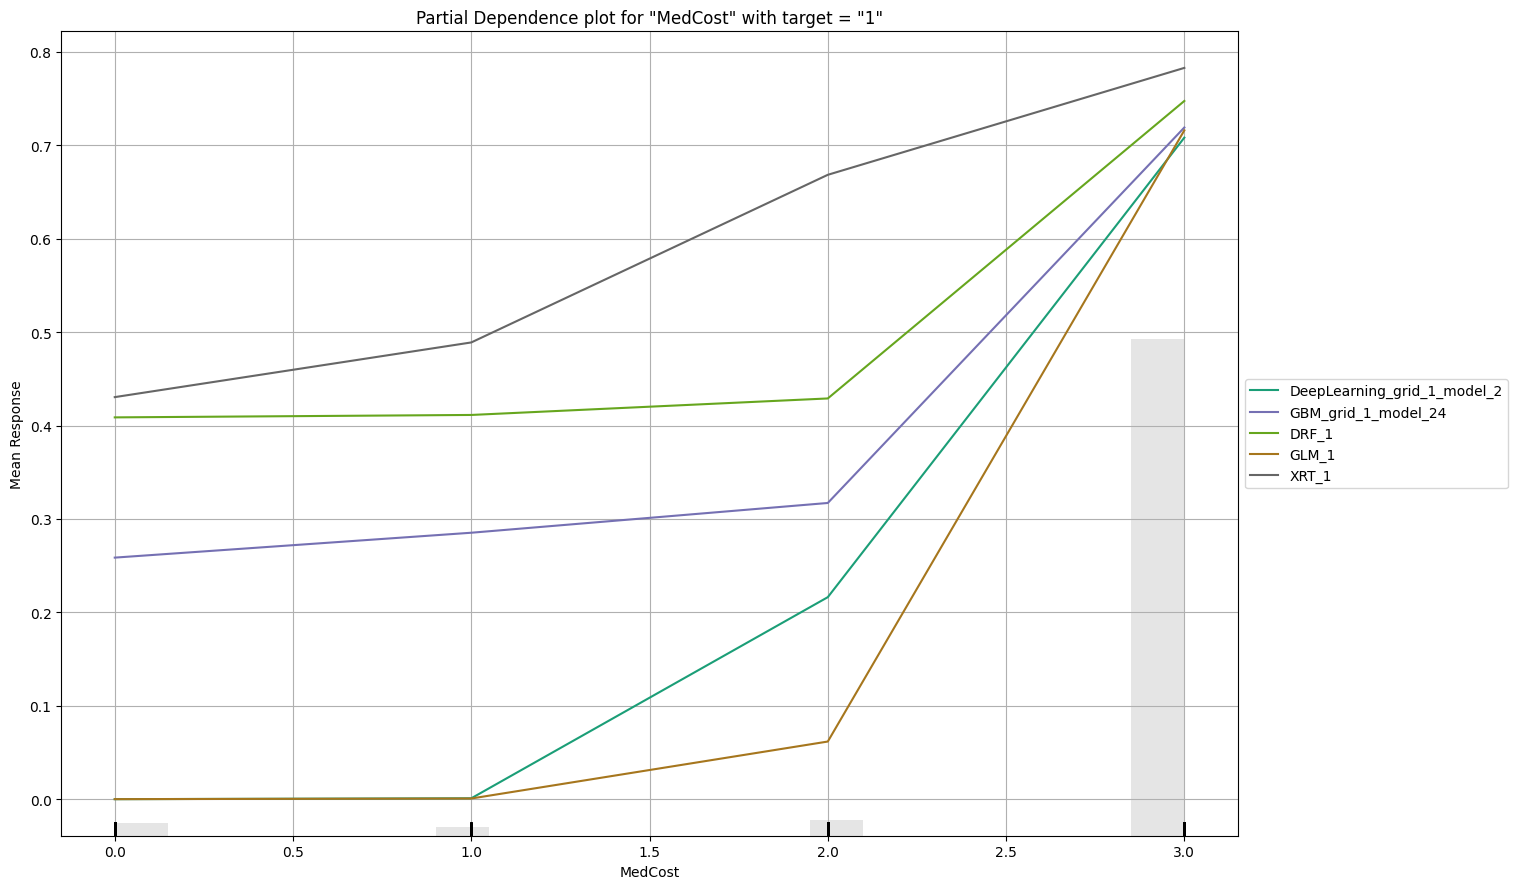

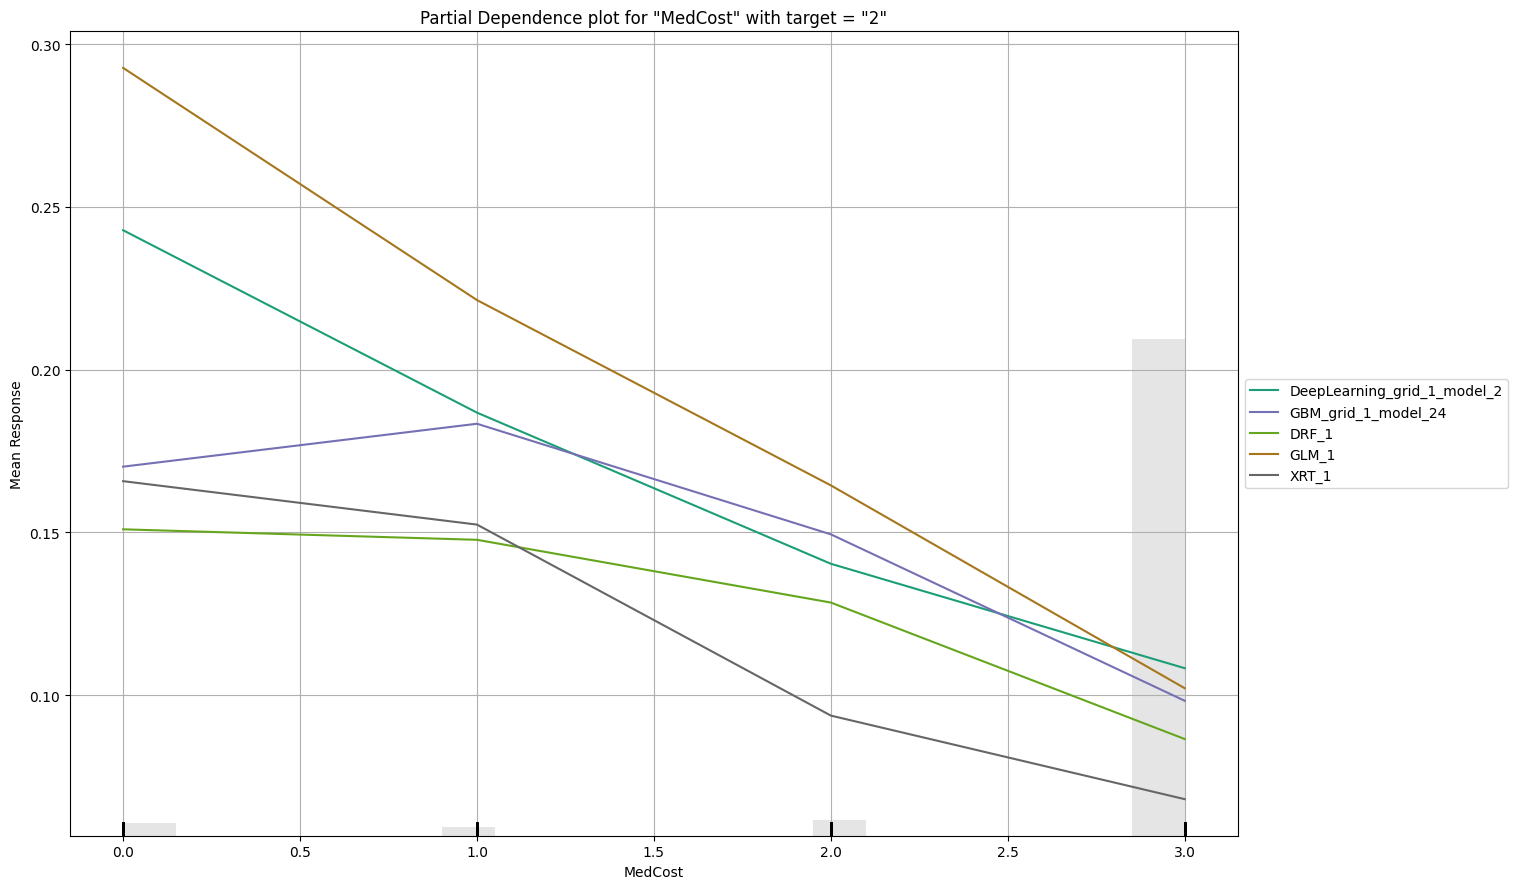

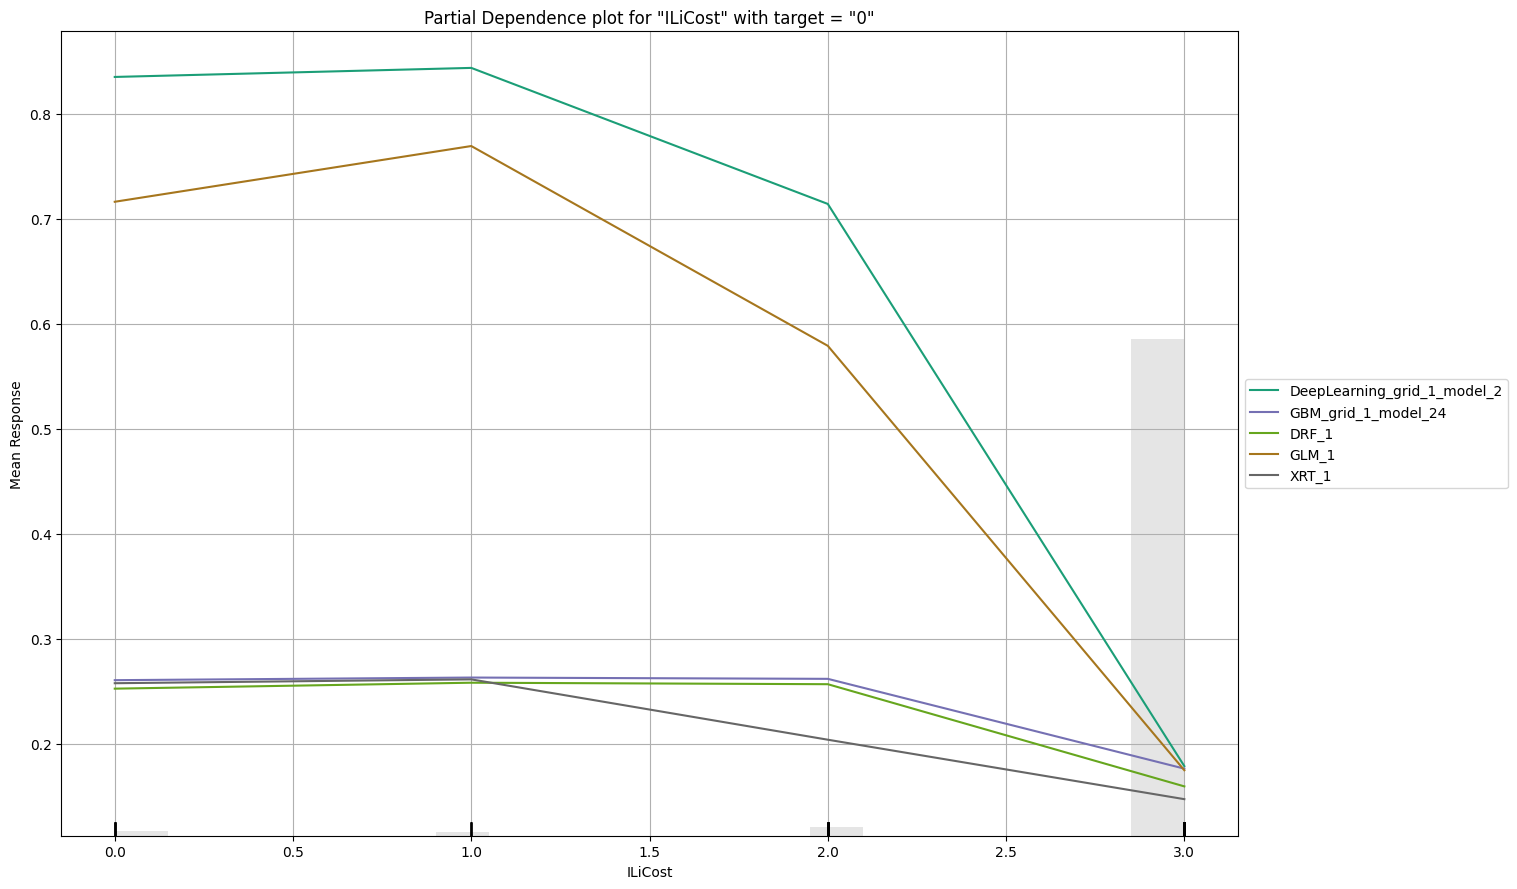

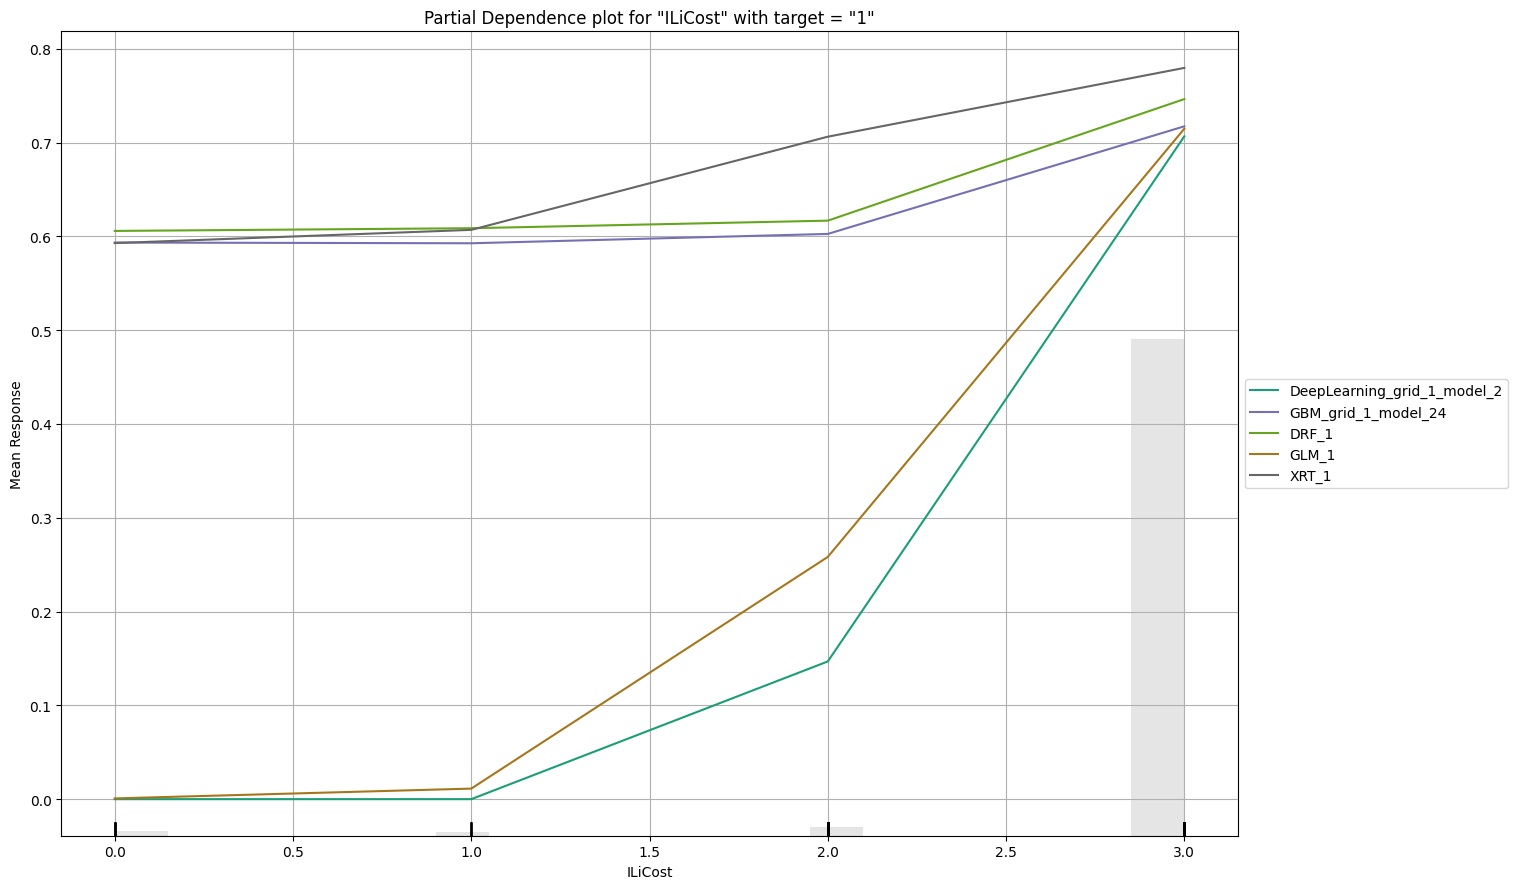

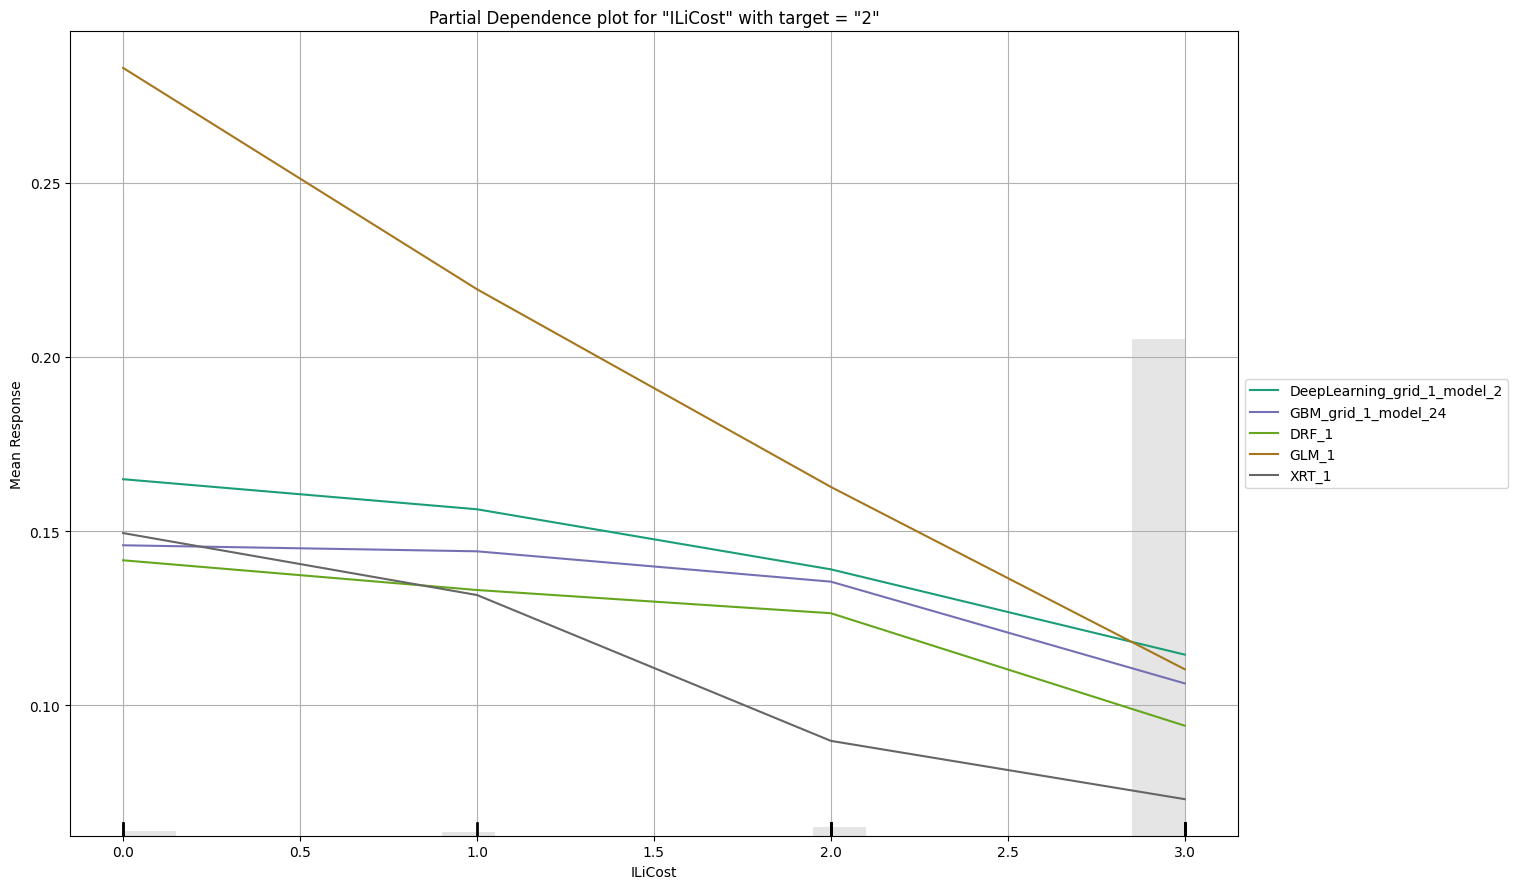

In [34]:
modelo_h2o.explain(teste)

In [35]:
previsoes_h2o = modelo_h2o.predict(teste)
previsoes_h2o = previsoes_h2o.as_data_frame(use_multi_thread=True)
previsoes_h2o

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


predict        p0            p1            p2
0           0  0.640578  1.274541e-03  3.581478e-01
1           2  0.095411  5.729040e-19  9.045890e-01
2           2  0.272365  1.596964e-24  7.276347e-01
3           1  0.047852  9.521374e-01  1.049233e-05
4           1  0.027241  9.727588e-01  1.153625e-08
...       ...       ...           ...           ...
5938        1  0.000142  9.998585e-01  4.891609e-13
5939        1  0.027151  9.728478e-01  9.484801e-07
5940        1  0.000034  9.999659e-01  5.524835e-15
5941        1  0.349766  6.502345e-01  5.142819e-09
5942        1  0.017260  9.827397e-01  5.986216e-09

[5943 rows x 4 columns]

In [36]:
teste = teste.as_data_frame(use_multi_thread=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [37]:
print(classification_report(teste["Accident"], previsoes_h2o["predict"]))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52       941
           1       0.94      0.94      0.94      4291
           2       0.74      0.86      0.79       711

    accuracy                           0.86      5943
   macro avg       0.74      0.76      0.75      5943
weighted avg       0.85      0.86      0.85      5943



In [41]:
tpot = TPOTClassifier(generations=200, population_size=200, offspring_size=0.2, mutation_rate=0.7, crossover_rate=0.3,
                         max_time_mins=60, scoring="accuracy", n_jobs=5, warm_start=True, config_dict="TPOT NN", verbosity=2, early_stop=False, random_state=3215)
tpot.fit(X_treino, y_treino)

                                                                              
Best pipeline: XGBClassifier(MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.1), learning_rate=0.001, max_depth=6, min_child_weight=15, n_estimators=100, n_jobs=1, subsample=0.5, verbosity=0)


TPOTClassifier(config_dict='TPOT NN', crossover_rate=0.3, early_stop=False,
               generations=200, max_time_mins=60, mutation_rate=0.7, n_jobs=5,
               offspring_size=0.2, population_size=200, random_state=3215,
               scoring='accuracy', verbosity=2, warm_start=True)

In [42]:
previsoes_tpot = tpot.predict(X_teste)
previsoes_tpot[:10]

array([2, 2, 0, 0, 1, 0, 2, 1, 1, 2], dtype=int64)

In [44]:
print(classification_report(y_teste, previsoes_tpot))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1037
           1       0.98      1.00      0.99      4244
           2       0.87      0.90      0.88       719

    accuracy                           0.96      6000
   macro avg       0.92      0.91      0.91      6000
weighted avg       0.96      0.96      0.96      6000



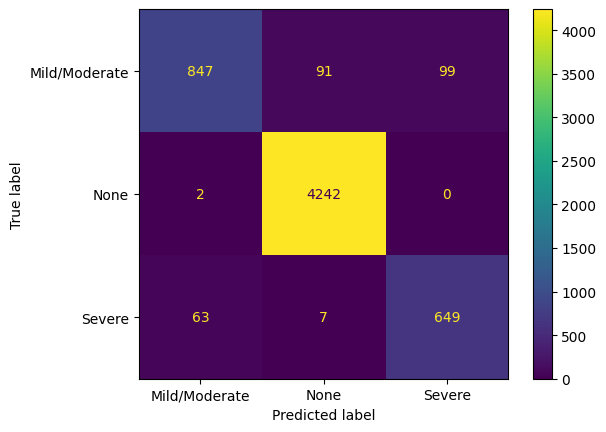

In [45]:
confusao = ConfusionMatrixDisplay.from_predictions(y_teste,previsoes_tpot, display_labels=["Mild/Moderate", "None", "Severe"])